# Cars 4 You: Expending Car Evaluations with ML

Project Developed by:

*  Catarina Martins (n20221914)
*  Inês Van Zeller (n20222047)
*  Marta Ribeiro (n20221886)
*  Nicole Nogueira (n20221961)

## 1. Import the needed libraries

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import numpy as np

## 2. Data importation and integration

In [2]:
train_data = pd.read_csv('project_data/train.csv')
test_data = pd.read_csv('project_data/test.csv')

In [3]:
data= train_data.copy()

## 3. Data exploration and understanding

### Metadata
- *carID*: An attribute that contains an identifier for each car.
- *Brand*: The car’s main brand (e.g. Ford, Toyota).
- *model*: The car model.
- *year*: The year of Registration of the Car.
- *mileage*: The total reported distance travelled by the car (in
 miles).
- *tax*: The amount of road tax (in £) that, in 2020, was
 applicable to the car in question.
- *fuelType*: Type of Fuel used by the car (Diesel, Petrol, Hybrid,
 Electric).
- *mpg*: Average Miles per Gallon.
- *engineSize*: Size of Engine in liters (Cubic Decimeters).
- *paintQuality%*:  The mechanic’s assessment of the cars’ overall paint
 quality and hull integrity (filled by the mechanic
 during evaluation). 
- *previousOwners*: Number of previous registered owners of the vehicle.
- *hasDamage*:  Boolean marker filled by the seller at the time of
 registration stating whether the car is damaged or
 not.
- *price*: The car’s price when purchased by Cars 4 You (in £).

In [4]:
#overview the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


1: our data has 14 variables (columns), being 10 numerical variables (float and integers) 
and 4 non-numerical variables (strings). Moreover, one of the variables is the carID.

2: besides all the variables have observations, some variables like tax and mpg present a considerable number of missing values.

In [5]:
#first 20 rows
data.head(20)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
5,14704,BMW,3 Series,2014.0,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0.000000,0.0
6,6924,Audi,A3,2017.0,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4.000000,0.0
7,50783,Skoda,Octavia,2017.0,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4.000000,0.0
8,67071,VW,Passat,2017.0,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4.000000,0.0
9,23348,Ford,Focus,2019.0,15300,Manual,10700.000000,Petrol,150.0,60.100000,1.0,35.0,1.000000,0.0


By acessing to the 20 first rows of the data, we can see:

1:There are some spelling mistakes in the data itself: 'for' instead of 'ford', anual' instead of 'manual' and 'etrol' instead of 'petrol', etc.

2:The variable 'previousOwners' that represents the number of previous registered owners of the vehicle, presents at least one negative value, which is impossible.

3:All the observations of the first 20 rows of the variable 'hasDamage' are 0.

In [6]:
#last 20 rows
data.tail(20)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75953,71932,VW,golf sv,2020.0,21490,Semi-Auto,1177.0,Petrol,145.0,42.80000,1.5,36.0,4.0,0.0
75954,28693,Ford,Kuga,2017.0,16495,Manual,25352.0,Diesel,145.0,60.10000,2.0,51.0,4.0,0.0
75955,53707,Toyota,Yaris,2017.0,10498,Manual,9857.0,Petrol,30.0,55.00000,1.3,58.0,1.0,0.0
75956,5311,Audi,Q5,2019.0,37900,Semi-Auto,1027.0,Diesel,150.0,38.20000,2.0,31.0,2.0,0.0
75957,67969,VW,T-Roc,2019.0,32490,Automatic,9475.0,Petrol,145.0,32.50000,2.0,62.0,3.0,0.0
75958,64925,Opel,Corsa,2017.0,7299,Manual,41616.0,Petrol,20.0,61.40000,1.0,82.0,2.0,0.0
75959,62955,Opel,Corsa,2017.0,7325,Manual,36154.0,Petrol,150.0,55.40000,1.4,79.0,4.0,0.0
75960,59735,Opel,Grandland X,2018.0,16499,Automatic,13562.0,Petrol,145.0,54.30000,1.2,65.0,2.0,0.0
75961,769,Audi,A1,2016.0,10790,Manual,41914.0,Petrol,0.0,67.30000,1.0,39.0,4.0,0.0
75962,64820,Opel,Astra,2016.0,8990,Manual,9370.0,NaN,20.0,64.20000,1.0,43.0,4.0,0.0


By acessing to the 20 first rows of the data, we can see that the spelling mistakes continue and the variable 'hasDamage' remain with all 0 observations. 

In [7]:
#Descriptive statistics for numerical data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
price,75973.0,16881.889553,9736.926322,450.000000,10200.00,14699.0,20950.0,159999.000000
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


For metric variables, we can see some metrics such as the mean, the minimum and maximum number, etc. to have a better inside of the data.

We can observe that the minimum number of 'mileage' is negative which is wrong because a car cannot travel negative miles. The same thing happens for the variables 'tax', 'mpg', 'engineSize', and 'previousOwners'.

In the 'previousOwners' and 'year' variables, the maximum numbers are floats which is a mistake because these variables should only assume integer numbers. The maximum of 'PaintQuality%' is more than 100%. The maximum of 'Mpg' is too high (it should be more or less 150)

As expected, all the observations of the variable 'hasDamage' are 0, which indicates that further ahead we are going to delete it because it does not add any information to our model. 


In [8]:
#Descriptive statistics for categorical data
data.describe(include = ['O'])

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


For non-metric features, we can observe features like the unique values and the observations that appear the most in each variable.

We can understand that are some missing values in these variables but not a considerable quantity. 

Besides there are only 72 different brands, there are 735 different models. We can not forget that these values are biased due to the spelling mistakes, which means that the quantity of unique values are lower than showed. 

Moreover, the most frequent car in our dataset is a manual petrol ford focus. 

In [66]:
#separate numerical and categorical features 

metric_features = ['year', 'mileage', 'tax', 'mpg',
                    'engineSize', 'paintQuality%', 'previousOwners', 'hasDamage']

non_metric_features= ['Brand','model','transmission','fuelType']

identifier = 'carID'

target = 'price'

In [5]:
for col in non_metric_features:
    print(f"\nColumn: {col}")
    print(data[col].unique())


Column: Brand
['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']

Column: model
[' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'
 ' 5 Series' ' Aygo' ' 4 Series' ' SLK' ' Viva' ' T-Roc' 'Focus'
 ' EcoSport' ' Tucson' ' EcoSpor' nan ' X-CLASS' ' CL Class' ' IX20'
 ' i20' ' Rapid'

Brand:
'VW': 'V', 'vw', 'v'
'Toyota': 'Toyot', 'TOYOTA', 'oyota', 'toyota', 'OYOTA', 'TOYOT', 'toyot'
'Audi': 'udi', 'AUDI', 'audi', 'Aud', 'aud', 'UDI', 'AUD'
'Ford': 'FOR', 'ord', 'For', 'FORD', 'ford', 'for', 'or', 'ORD'
'BMW'. 'MW', 'bmw', 'BM', 'mw'
'Skoda': 'koda', 'skoda', 'SKODA', 'Skod', 'kod', 'SKOD', 'KODA', 'skod'  
'Opel': 'Ope', 'opel', 'pel', 'pe', ', OPEL', 'PEL', 'OPE', 'ope'
'Mercedes': 'mercedes', 'Mercede', 'MERCEDES', 'ercedes', 'mercede', 'ERCEDES' ,'ercede', 'MERCEDE'
'Hyundai': 'yundai', 'Hyunda', 'hyundai', 'HYUNDAI', 'yunda', 'HYUNDA', 'ud', 'hyunda'
'w','W' 
72

Model: 
'Golf': ' GOLF', ' Gol',' golf','golf',' Golf',' gol', ' GOL', 'Gol'
'Yaris': ' Yaris',' YARIS',' Yari',' yaris', ' yari','Yari', ' YARI', 'yaris' 
'Q2': ' q2',' Q2'
'2 Series':' 2 series', ' 2 serie', '2 Series',' 2 SERIES',' 2 Serie','2 Serie',' 2 Series'
'3 Series':' 3 Series',' 3 Serie',' 3 series',' 3 SERIES',' 3 serie', '3 Serie'
'A3':' A3',' a3'
'Octavia':' Octavi',' OCTAVIA',' Octavia',' octavia','Octavi', 'octavia'
'Passat': ' PASSAT',' passat',' Passa','Passat',' Passat'
'Insignia':' Insigni', ' INSIGNIA',' insignia',' Insignia',' INSIGNI', 'Insigni'
'Fabia':' Fabia', ' fabia', ' FABIA',' Fabi', 'FABIA'
'A Class':' A Clas',' A Class' ,' a class',' A CLASS','a class', 'A CLASS', ' a clas'
'Ka+': ' Ka+',' KA+',' ka+', 'ka+'
'GLC Class': ' GLC Class',' GLC CLASS',' GLC Clas',' glc class', ' glc clas'
'I30':' i30',' I30' 
'C Class': ' C Class':' C Clas',' C CLASS', ' c class','C Clas', ' C CLAS', 'c class',' c clas' 
'Polo':' POLO', ' Polo'
'E Class':' E Class',' E Clas',' E CLASS',' e class','E CLASS', 'e class'
'Q5': ' Q5',' q5', 'q5'
'Up':'U',' up',' UP',' Up',' U', 'UP'
'Fiesta':' FIESTA',' fiesta',' Fiest',' Fiesta', 'fiesta','Fiest', 'FIESTA'
'C-HR':' C-H',' c-hr',' C-HR'
'Mokka X':' mokka x', ' MOKKA X',' Mokka X'
'Corsa':' Corsa',' corsa',' Cors',' CORSA',' cors', ' CORS','corsa'
'Astra':' ASTRA', ' Astr', ' Astra', ' astra', 'ASTRA', 'astra'
'TT':' tt',' TT', ' T'
'5 Series': ' 5 Series', ' 5 Serie', ' 5 SERIES',' 5 series', '5 SERIES'
'Aygo': ' aygo',' ayg',' AYGO',' Ayg',' Aygo','aygo', ' AYG'
'4 Series':' 4 SERIES', ' 4 Serie', ' 4 serie', '4 series','4 Series',' 4 Series',' 4 series'
'SLK':' slk',' SLK'
'Viva':' viva',' Viva',' VIVA',' Viv' 
'Focus':' Focus',' Focu',' FOCUS',' focus',' FOCU', 'focus','Focu', ' focu', 'FOCUS'
'EcoSport':' EcoSpor', ' ECOSPORT',' ecosport',' EcoSport'
'X-CLASS':' x-clas',' X-CLAS',' x-class', ' X-CLASS'
'CL Class': ' cl class',' CL Clas',' CL CLASS', ' CL Class'
'IX20':' ix20', ' IX20'
'Rapid': ' Rapi',' rapid', ' Rapid'
'Auris':' Auris', ' AURIS',' auris',' Auri'
'I20':' i20',' I20'
'X3':' x3',' X3' 
'A8':' A8', 'a8'
'GLS Class':' GLS Clas',' GLS CLASS', ' gls class', ' GLS Class'
'B-MAX': ' B-MA',' B-MAX','B-MA',' b-max'
'A4': ' A4', ' a4'
'Kona':' KONA',' Kon',' Kona', ' KON', ' kona'
'I10':' i10',' I10'
'A1':' A1',' a1',
'Mokka': ' Mokka ', ' Mokk',' Mokka',' mokka ',' mokka',' MOKKA', 'Mokka ', 'Mokk'
'S-MAX': ' S-MA',' s-max',' S-MAX', ' s-ma'
'X2': ' x2',' X2'
'Crossland X': ' crossland x', ' CROSSLAND X',' Crossland X'
'Tiguan':' Tiguan',' tiguan',' Tigua',' TIGUAN',' TIGUA', 'Tigua', 'TIGUAN', 'tiguan'
'A5': ' A5', ' a5'
'GLE Class':' GLE Clas',' GLE Class',' gle class', ' GLE CLASS'
'Zafira':' Zafira', ' Zafir',' ZAFIRA',' zafira','Zafir'
'Ioniq':' Ioni',' Ioniq', ' IONIQ', 'IONIQ', ' ioniq'
'A6':' A6',' a6'
'Yeti Outdoor': ' yeti outdoor',' Yeti Outdoor' 
'X1':' x1','x1',' X1'
'Polo': 'POLO', ' polo', ' Pol','polo','Pol'
'Scala':' SCALA',' Scala',' scala', ' Scal', ' scal'
'S Class':' S Class',' S Clas',' s class',' S CLASS'
'1 Series':' 1 Series',' 1 SERIES', ' 1 Serie',' 1 series', '1 SERIES',' 1 SERIE', '1 series', ' 1 serie'
'Kamiq': ' KAMIQ',' KAMI', ' kamiq', ' Kamiq'
'Kuga': ' Kug', ' KUGA', ' kuga','Kuga',' Kuga', 'kuga'
'Tourneo Connect': ' tourneo connect', ' Tourneo Connect'
'Q7': ' q7',' Q7'
'GLA Class':' GLA Class',' GLA CLASS',' GLA Clas',' gla class'
'Arteon': ' arteon', ' Arteon'
'SL CLASS':' SL CLAS',' SL CLASS', ' sl class', ' SL'
'Tucson': ' Tucson',' TUCSON',' Tucso',' tucson',' TUCSO', 'Tucso'
'Santa Fe':' Santa F',' santa fe',' SANTA FE',' Santa Fe'
'Grandland X':' Grandland X',' grandland x', ' GRANDLAND X'
' I800':
'RAV4': ' rav4','RAV4','RAV',' RAV','rav4', ' rav', ' RAV4'
'Touran': ' Touran', 'Toura', ' TOURAN',' touran',' Toura', ' TOURA'
'Citigo': ' Citig',' citigo',' Citigo',' CITIGO'
'Roomster':' Roomste', ' Roomster'
'Prius':' PRIUS',' Prius', 'Prius',' prius'
'Corolla': ' corolla',' COROLLA', ' Coroll',' Corolla', 'corolla'
'B Class': ' b class', ' B Clas',' B Class',  ' B CLASS', 'b class'
'Sharan':' sharan',' Shara', ' Sharan', ' SHARAN'
' Q':
'Kodiaq':' Kodia', ' kodiaq','kodiaq',' KODIAQ', ' Kodiaq'
'V Class': ' V Clas',' V CLASS', ' V Class'
'Caddy Maxi Life':' Caddy Maxi Lif', ' Caddy Maxi Life'
'Superb':' Superb',' Super',' SUPERB',' superb',' super'
' Getz',
'T-Roc':' T-Roc',' T-RO',' t-roc',' T-Ro',' T-ROC'
'Combo Life':' COMBO LIFE',' combo life', ' Combo Lif', 'COMBO LIFE', ' Combo Life'
'Beetle':' Beetl',' Beetle', ' beetle'
'Galaxy': ' GALAXY',' Galax',' galaxy',' Galaxy'  
'M3':' M3', ' m3' 
'GTC': 'gtc',' GTC', ' gtc'
'X4':' X4'
'KA': ' Ka',' ka',' K', ' KA'
'IX35': ' ix35',' IX35' 
'Grand Tourneo Connect': ' Grand Tourneo Connec', ' Grand Tourneo Connect'
'M4':' m4', ' M4'
'Tourneo Custom':' tourneo custom', ' Tourneo Custo', ' Tourneo Custom'
'Z4':' Z4', ' z4'
'X5': ' X5',' x5' 
'Meriva': ' Meriva',' MERIVA',' Meriv', ' meriva'
'yeti outdoor': ' YETI OUTDOOR',' Yeti Outdoo', ' yeti outdoor'
'RS6':' RS6'
'Verso': ' VERSO',' verso',' Verso', ' Vers'
'Touareg': ' Touareg',' TOUAREG',' touareg', ' Touare'
'Mondeo':' MONDEO',' Mondeo',' mondeo',' MONDE',' Monde'
'Shuttle':' shuttle', ' Shuttle'
'CLS Class':' CLS Class', ' cls class',' CLS Clas', ' CLS CLASS'
'C-MAX': ' C-MAX',' c-max',' C-MA'
'Puma': ' puma',' PUMA', ' Puma'
'CLA Class':' CLA Class', ' CLA CLASS', ' cla class'
'I40':' I40',' i40'
'Q3': ' q3',' Q3'
'Tiguan Allspace':' TIGUAN ALLSPACE',' tiguan allspace', ' Tiguan Allspac', ' Tiguan Allspace'
'6 Series': ' 6 SERIES', ' 6 series',' 6 Series', ' 6 Serie'
'Caravelle':' caravelle',' Caravell', ' Caravelle'
'Karoq': ' Karoq',' karoq',' KAROQ', ' Karo'
'I3':' i3', 'i3', ' I3'
'Grand C-MAX':' GRAND C-MAX',' grand c-max',' Grand C-MA', ' Grand C-MAX'
'T-Cross': ' T-Cros',' T-CROSS', ' T-Cross',' t-cros', ' t-cross'
'A7':' a7',' A7' 
'Golf SV':' Golf SV',' golf sv', ' GOLF SV'
'A':' a', ' A' 
' Agila':
' GT86': ' gt86'
'Yeti': ' yeti', ' Yet', ' Yeti'
' California':
'X':' x', ' X'
'Land Cruiser': ' Land Cruise, ' Land Cruiser'
'EDGE': ' Edge',' edge', ' Edg', ' EDGE'
'X6':' X6'
'Fusion':' Fusion' 
'GL Class': ' GL CLASS', ' gl class',' GL Class' 
'Scirocco':' scirocco',' SCIROCCO',' Scirocc',' Scirocco'
'Z3':' Z3'
' PROACE VERSO':
'Hilux':' hilux',' Hilux', ' Hilu'
'Amarok':' amarok',' Amarok', ' Amaro'
'CC':' cc', ' CC'
'7 Series':' 7 Serie', ' 7 SERIES', ' 7 series', ' 7 Series'
'Avensis':' AVENSIS', ' avensis', ' Avensis'
' Eos':
'M Class':' m class', ' M CLASS', ' M Class', ' M Clas'
'Grandland ':' grandland ', ' Grandland '
'Zafira Tourer':' Zafira Toure', ' ZAFIRA TOURER', ' Zafira Tourer'
' RS5':
'R8':' R8', ' r8'
'Mustang':' mustang',' Mustang'
' I1':
' Antara':
'Q8':' Q8' 
' Camry':
'CLK':' CLK' 
'RS3':' RS3' 
'Jetta': ' JETTA', ' Jetta'
' Kadjar':
' SQ5': 
' RS4':
'Supra':' Supra'
' i8':
'X7':' X7'
' sq7':' SQ7'
' G Class':
' S3':' s3' 
' I80':
' Crossland ':
'Arteon':' Arteo', 'Arteo' , ' ARTEON'
' Tigra':
' Escort':
'GLB Class': ' glb class', ' GLB Class'
' Vivaro':
' Verso-S':
'Adam': ' Ada',' adam', ' ADAM', ' Adam'
'M5':' M5' 
' Veloste':
' S4':
' IQ': 
' A2':
' Caddy Maxi':
'200':
' Streetka':
' v class': 
' Caddy':   
' Cascada':
' Accent':
' S8':    
' RS': 
'Golf S':' golf s', ' Golf S'
' Z':
' Ranger':
' I2':
' M':
'220':
'VECTRA': 'Vectra',' Vectra', ' VECTRA'
' 8 Serie': ' 8 SERIES'
'230':  
' Ampera':
' Fox':  
'Urban Cruiser': ' Urban Cruise', ' Urban Cruiser'
' M2':   
' S5':    
' IX2':
' CLC Class' 
' M6':
' Terracan':  
' i':   
   

transmission:
'Semi-Auto':'Semi-Aut','semi-auto','emi-Auto', 'SEMI-AUTO','SEMI-AUT','EMI-AUTO','emi-Aut','emi-auto','semi-aut'
'Manual':'anual', 'manual','Manua','MANUAL',' Manual ','ANUAL','manua','anua','MANUA',' manual ',' MANUAL ',' Manual','Manual ','manual '
'Automatic':'AUTOMATIC', 'automatic','Automati','utomatic','UTOMATIC','automati','AUTOMATI','utomati' 
'unknown':'unknow','UNKNOWN','nknown','nknow'
'Other'     
      
   
   
fuelType:  
'Petrol':'etrol','petrol','PETROL','Petro','petro','ETROL','PETRO','etro','ETRO'
'Diesel':'diesel','iesel','Diese','DIESEL','DIESE','IESEL','iese','diese','IESE'
'Hybrid':'HYBRID','ybri','Hybri','ybrid','hybrid','YBRID','HYBRI'
'Electric':
nan
'Other':'ther','Othe','OTHER','other'
   

### Checking memory usage and data types

In [11]:
#checking memory usage
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 23.9 MB


### Checking duplicates

In [12]:
#checking duplicates
data.duplicated().sum()

0

There are no duplicates in the current dataset.  

### Checking missing values

In [13]:
#Number of missing values
data.isna().sum()

carID                0
Brand             1521
model             1517
year              1491
price                0
transmission      1522
mileage           1463
fuelType          1511
tax               7904
mpg               7926
engineSize        1516
paintQuality%     1524
previousOwners    1550
hasDamage         1548
dtype: int64

The variables that have more missing values are 'tax' and 'mpg'. The rest of them have basically the same number of missing values, excluding 'carId', 'price'.

In [14]:
#Number of missing values in each column as a percentage
data.isna().sum()/len(data) * 100

carID              0.000000
Brand              2.002027
model              1.996762
year               1.962539
price              0.000000
transmission       2.003343
mileage            1.925684
fuelType           1.988864
tax               10.403696
mpg               10.432654
engineSize         1.995446
paintQuality%      2.005976
previousOwners     2.040198
hasDamage          2.037566
dtype: float64

### Checking outliers

In [15]:
## Define a function that plots multiple box plots

def plot_multiple_boxplots(data, feats, title="Numeric Variables' Box Plots"):

    # Prepare figure. Create individual axes where each histogram will be placed
    fig, axes = plt.subplots(4, ceil(len(feats) / 4), figsize=(40, 30))

    # Plot data
    # Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
    for ax, feat in zip(axes.flatten(), feats): # Notice the zip() function and flatten() method
      sns.boxplot(x=data[feat], ax=ax)
      ax.set_title(feat)

    # Layout
    # Add a centered title to the figure:
    plt.suptitle(title)
    #fig, ax = plt.subplots()
    #ax.boxplot(feat,
             #  patch_artist= True,
             #  boxprops= dict(facecolor = "lightblue"))
    plt.show()

    return

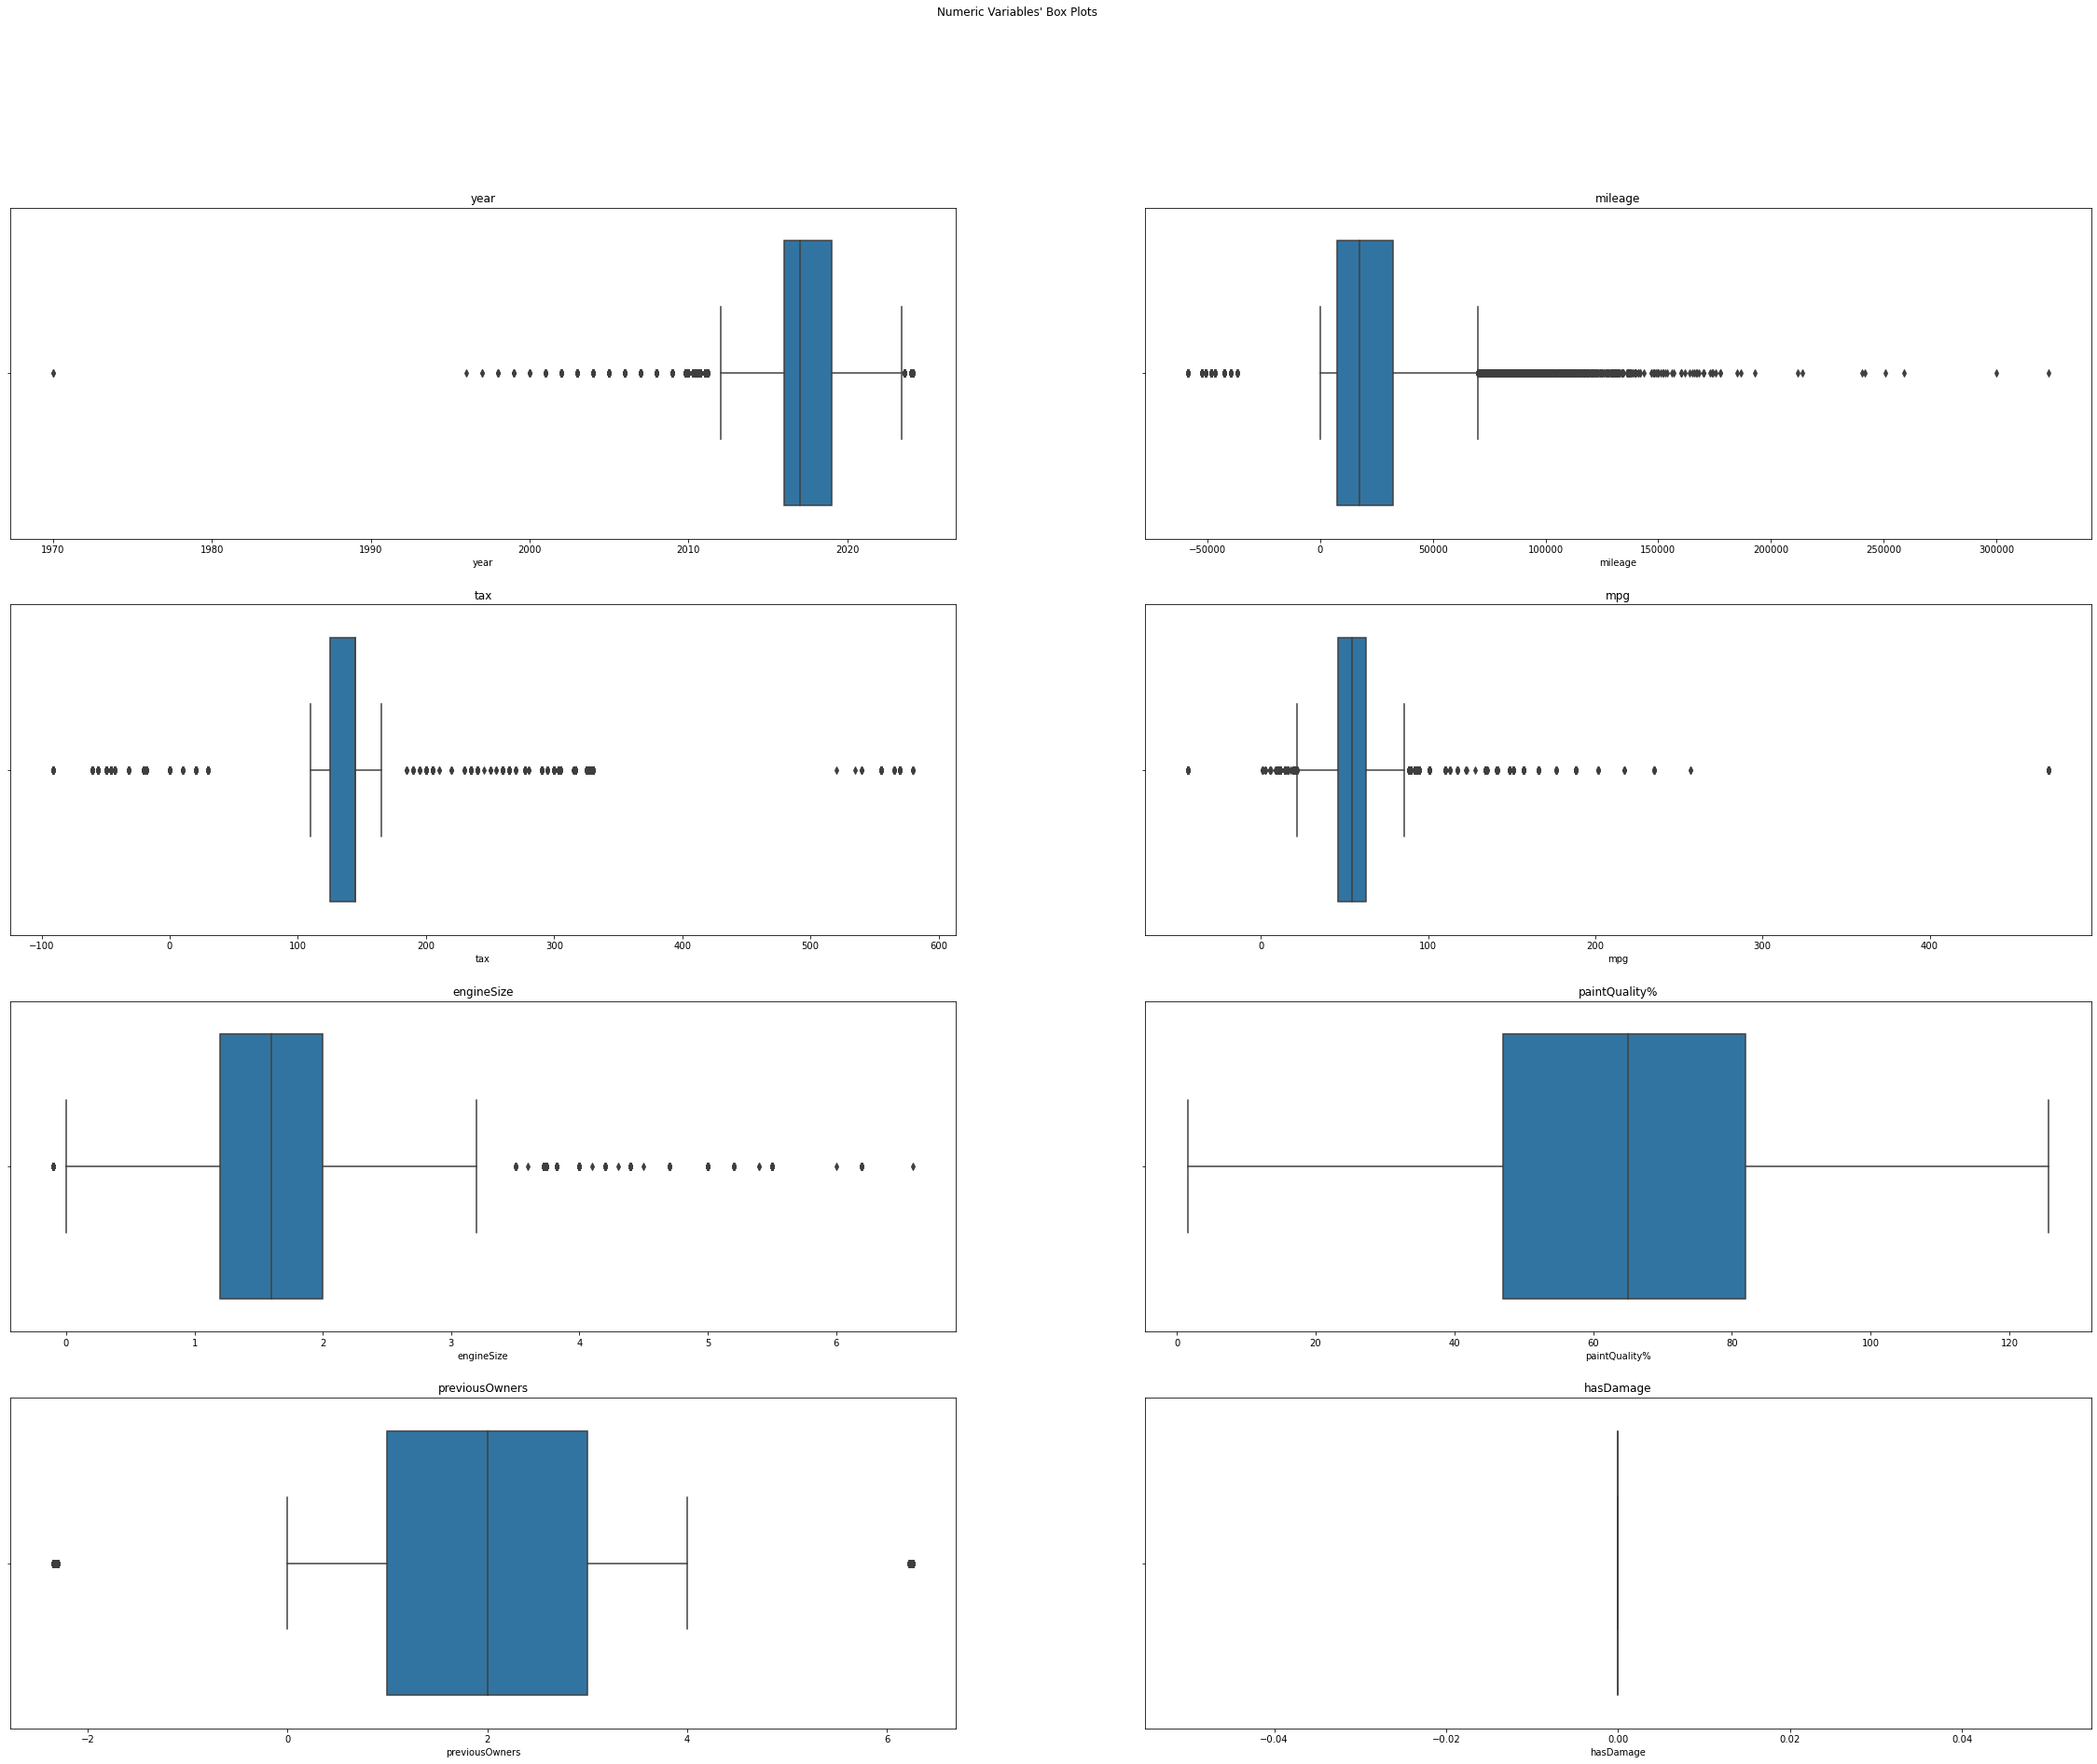

In [16]:
plot_multiple_boxplots(data, metric_features)

We have a considerable number of outliers in all variables, except of 'paintQuality%', 'previousOwners' and 'hasDamage'. In the varibles 'mileage', 'mpg', 'engineSize', 'previousOwners', the negative outliers are incoherences so they are probably going to be removed. 

In [17]:
df= pd.DataFrame(data[metric_features])

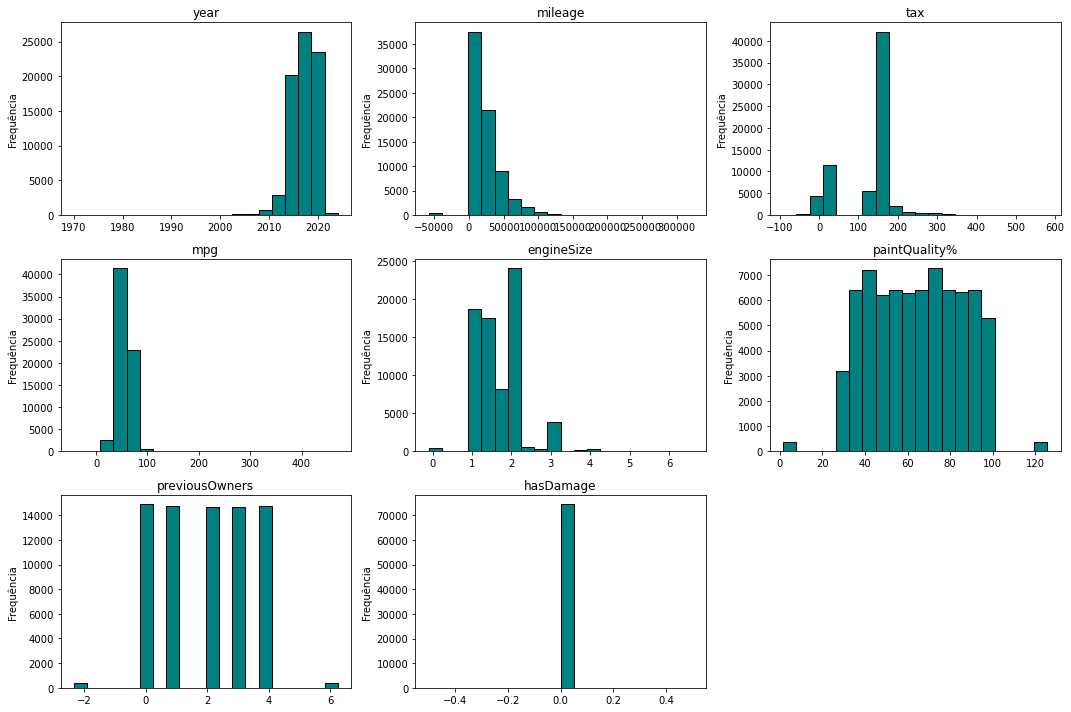

In [18]:
num_cols = df.select_dtypes(include=['number']).columns
n = len(num_cols)

# Ajusta layout
fig, axes = plt.subplots(nrows=(n // 3) + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].hist(df[col].dropna(), bins=20, color='teal', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequência')

# Remove eixos vazios (se sobrarem)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In terms of distribution, most variables are skewed either to the left ('mileage') or to the right ('year'). The closest to a normal distribution is identified in 'PaintQuality%'.

In [19]:
sns.set_style('dark')
sns.set_palette("Paired")

# Create 4 subplots stacked vertically
fig, ax = plt.subplots(nrows=4, ncols=1, dpi=300, figsize=(20, 40))

# Plot each variable in its own row
sns.countplot(data=test_data, x='Brand', ax=ax[0])
sns.countplot(data=test_data, x='model', ax=ax[1])
sns.countplot(data=test_data, x='transmission', ax=ax[2])
sns.countplot(data=test_data, x='fuelType', ax=ax[3])

# Improve spacing between plots
plt.tight_layout()
plt.show()

The high amount of spelling mistakes leads to a lot of categories in each variable. One solution to this is merging the categories which would improve the readability of the plots. 

In [20]:
cor_spearman = data[metric_features].corr(method ='spearman')
cor_spearman

,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
year,1.000000,-0.780597,0.317446,-0.313547,-0.037248,0.004975,0.001191,NaN
mileage,-0.780597,1.000000,-0.254982,0.322574,0.098192,-0.001336,0.004020,NaN
tax,0.317446,-0.254982,1.000000,-0.551523,0.160515,0.004366,-0.000583,NaN
mpg,-0.313547,0.322574,-0.551523,1.000000,-0.201771,0.001541,0.001453,NaN
engineSize,-0.037248,0.098192,0.160515,-0.201771,1.000000,0.003838,0.003925,NaN
paintQuality%,0.004975,-0.001336,0.004366,0.001541,0.003838,1.000000,-0.005642,NaN
previousOwners,0.001191,0.004020,-0.000583,0.001453,0.003925,-0.005642,1.000000,NaN
hasDamage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

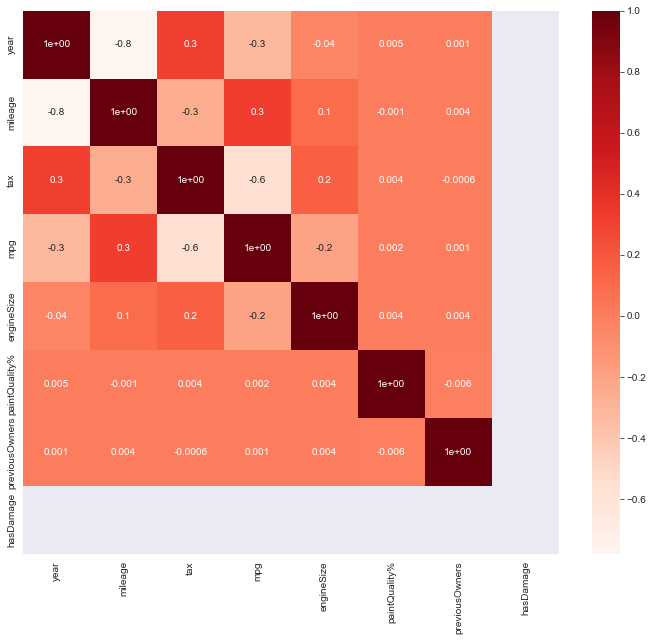

In [22]:
cor_heatmap(cor_spearman)

According to this correlation matrix, the variable 'mileage' is the only one that has a high negative correlation with year (<0.80), noting that we have to pre process the data in order to get reliable insides. 

NameError: name 'os' is not defined

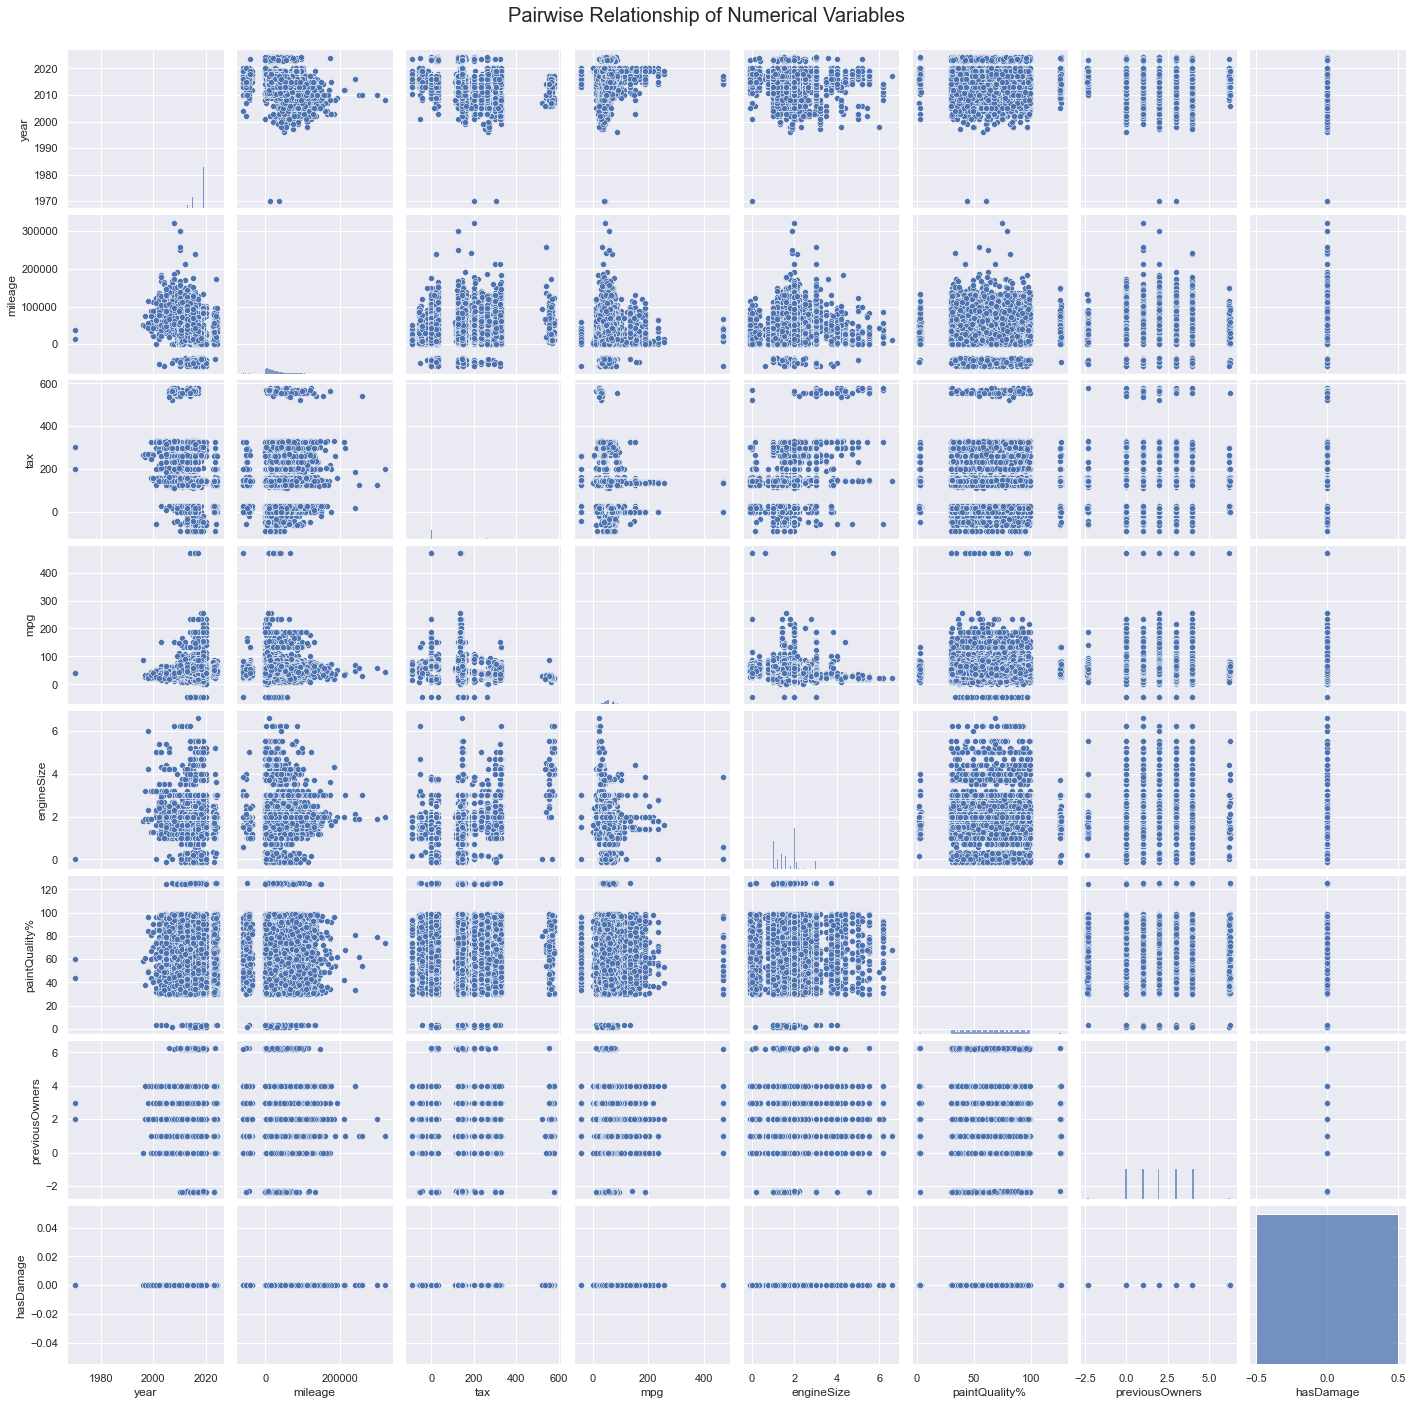

In [23]:
# Pairwise Relationship of Numerical Variables
sns.set()

# Setting pairplot
sns.pairplot(df[metric_features], diag_kind="hist")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle("Pairwise Relationship of Numerical Variables", fontsize=20)

# if the eda directory is not present then create it first
if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'pairwise_numeric_scatterplots.png'), dpi=200)
plt.show()

## 4. Data preparation

### Set index

In [4]:
data.set_index('carID', inplace = True)

In [5]:
data

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,Mercedes,C Class,2015.0,13498,Manual,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0
6265,Audi,Q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0
54886,Toyota,Aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0


### Changing datatypes

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


In [7]:
data['year'] = data['year'].round().astype('Int64')
data['previousOwners'] = data['previousOwners'].round().astype('Int64')

In [8]:
data = data.astype({'Brand' : 'object',
                    'model' : 'object',
                    'year' : 'Int64',
                    'transmission' : 'object',
                    'mileage' : 'float64',
                    'fuelType' : 'object',
                    'tax' : 'float64',
                    'mpg' : 'float64',
                    'engineSize' : 'float64',
                    'paintQuality%': 'float64',
                    'previousOwners' : 'Int64',
                    'hasDamage' : 'bool'})

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75973 entries, 69512 to 15795
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  Int64  
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  Int64  
 12  hasDamage       75973 non-null  bool   
dtypes: Int64(2), bool(1), float64(5), int64(1), object(4)
memory usage: 7.8+ MB


The datatypes of the variables 'year' and 'previousOwners' and 'hasDamage' were changed into 'Int64', 'Int64' and 'bool' respectively. Also, the memory usage decreased to 7.8+ MB. 

In [10]:
data.head(20)

,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,,
69512,VW,Golf,2016,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4,False
53000,Toyota,Yaris,2019,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1,False
6366,Audi,Q2,2019,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4,False
29021,Ford,FIESTA,2018,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2,False
10062,BMW,2 Series,2019,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3,False
14704,BMW,3 Series,2014,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0,False
6924,Audi,A3,2017,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4,False
50783,Skoda,Octavia,2017,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4,False
67071,VW,Passat,2017,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4,False


It is important to note that, even though, 'previousOwners' no longer has decimal values, it still has negative numbers that must be handled. 

### Slipt the data into train and validation dataset

#### The Hold Out Method

In [11]:
X = data.drop('price', axis = 1)
y = data['price']

In [12]:
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 0, 
                                                  shuffle = True)

In [13]:
X_train

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
42520,Mercedes,E Class,2018,Semi-Auto,1306.0,Diesel,145.0,41.5,3.0,55.0,3,False
25115,Ford,Focus,2015,Automatic,7802.0,petrol,NaN,NaN,1.6,65.0,2,False
45113,Mercedes,C Class,2017,Automatic,18495.0,Diesel,NaN,NaN,2.1,96.0,4,False
34623,Hyundai,IX20,2018,Manual,6684.0,Petrol,150.0,50.4,1.4,51.0,3,False
66409,VW,Gol,2019,Automatic,12617.0,ETROL,145.0,37.7,2.0,54.0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
47192,Skoda,Karoq,2019,Automatic,4797.0,Diesel,145.0,62.8,1.6,95.0,1,False
71813,VW,Tiguan,2012,Automatic,98000.0,Diesel,200.0,47.7,2.0,99.0,3,False
4910,Audi,A1,2019,Manual,1800.0,Petrol,145.0,47.9,1.0,92.0,2,False


In [14]:
X_val

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
37025,Mercedes,C Class,2016,emi-Auto,-50755.21023,Diesel,30.0,64.2,1.6,NaN,0,False
65090,Opel,Mokka,2015,Manual,61000.00000,Petrol,160.0,NaN,1.4,41.0,1,False
29197,Ford,Focus,2018,Manual,8839.00000,Petrol,145.0,57.7,1.0,87.0,0,False
22100,Ford,Focus,2019,Manual,6220.00000,Petrol,145.0,58.9,1.0,81.0,6,False
70417,VW,T-Cross,2019,Manual,6209.00000,Petrol,145.0,47.9,1.0,33.0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
53822,Toyota,Yaris,2018,Manual,15958.00000,Petrol,NaN,58.9,1.5,91.0,3,False
49387,Skoda,Kamiq,2019,Automatic,2074.00000,Petrol,145.0,43.5,1.5,38.0,2,False
47022,Skoda,Octavia,2017,Manual,10326.00000,Diesel,145.0,68.9,1.6,84.0,1,False


In [15]:
y_train

carID
42520    35980
25115     8899
45113    23572
34623    12000
66409    26490
         ...  
47192    21555
71813     8000
4910     20998
67195    19891
15659     9998
Name: price, Length: 53181, dtype: int64

In [16]:
y_val

carID
37025    18341
65090     8000
29197    12699
22100    16000
70417    17987
         ...  
53822    10990
49387    21999
47022    11750
26838     3999
29143    16990
Name: price, Length: 22792, dtype: int64

### Handling Incoherencies

#### Correction of spelling mistakes for categorical variables:

In [17]:
#corrections of 'brand' for X_train

correct_brand = {
    'VW': ['V', 'vw', 'v', 'W', 'w'],
    'Toyota': ['Toyot', 'TOYOTA', 'oyota', 'toyota', 'OYOTA', 'TOYOT', 'toyot'],
    'Audi': ['udi', 'AUDI', 'audi', 'Aud', 'aud', 'UDI', 'AUD'],
    'Ford': ['FOR', 'ord', 'For', 'FORD', 'ford', 'for', 'or', 'ORD'],
    'BMW': ['MW', 'bmw', 'BM', 'mw'],
    'Skoda': ['koda', 'skoda', 'SKODA', 'Skod', 'kod', 'SKOD', 'KODA', 'skod'],
    'Opel': ['Ope', 'opel', 'pel', 'pe', 'OPEL', 'PEL', 'OPE', 'ope'],
    'Mercedes': ['mercedes', 'Mercede', 'MERCEDES', 'ercedes', 'mercede', 'ERCEDES', 'ercede', 'MERCEDE'],
    'Hyundai': ['yundai', 'Hyunda', 'hyundai', 'HYUNDAI', 'yunda', 'HYUNDA', 'ud', 'hyunda']
}

# Create a reverse lookup dictionary (each incorrect form maps to the correct one)
replacement_dict = {variant: correct for correct, variants in correct_brand.items() for variant in variants}

# Replace incorrect brand names with the correct ones
X_train["Brand"] = X_train["Brand"].replace(replacement_dict)

# Optional: verify the cleaning
print(X_train["Brand"].unique())

# Optional: save the cleaned dataset
# df.to_csv("train_cleaned.csv", index=False)

['Mercedes' 'Ford' 'Hyundai' 'VW' 'Opel' 'Audi' 'Toyota' 'BMW' nan 'Skoda']


In [18]:
#corrections of 'brand' for X_val

correct_brand = {
    'VW': ['V', 'vw', 'v', 'W', 'w'],
    'Toyota': ['Toyot', 'TOYOTA', 'oyota', 'toyota', 'OYOTA', 'TOYOT', 'toyot'],
    'Audi': ['udi', 'AUDI', 'audi', 'Aud', 'aud', 'UDI', 'AUD'],
    'Ford': ['FOR', 'ord', 'For', 'FORD', 'ford', 'for', 'or', 'ORD'],
    'BMW': ['MW', 'bmw', 'BM', 'mw'],
    'Skoda': ['koda', 'skoda', 'SKODA', 'Skod', 'kod', 'SKOD', 'KODA', 'skod'],
    'Opel': ['Ope', 'opel', 'pel', 'pe', 'OPEL', 'PEL', 'OPE', 'ope'],
    'Mercedes': ['mercedes', 'Mercede', 'MERCEDES', 'ercedes', 'mercede', 'ERCEDES', 'ercede', 'MERCEDE'],
    'Hyundai': ['yundai', 'Hyunda', 'hyundai', 'HYUNDAI', 'yunda', 'HYUNDA', 'ud', 'hyunda']
}

# Create a reverse lookup dictionary (each incorrect form maps to the correct one)
replacement_dict = {variant: correct for correct, variants in correct_brand.items() for variant in variants}

# Replace incorrect brand names with the correct ones
X_val["Brand"] = X_val["Brand"].replace(replacement_dict)

# Optional: verify the cleaning
print(X_val["Brand"].unique())

# Optional: save the cleaned dataset
# df.to_csv("train_cleaned.csv", index=False)

['Mercedes' 'Opel' 'Ford' 'VW' 'Toyota' nan 'BMW' 'Skoda' 'Audi' 'Hyundai']


In [19]:
#correction of 'model' for X_train
correct_model = {
    'Golf': [' GOLF', ' Gol', ' golf', 'golf', ' Golf', ' gol', ' GOL', 'Gol'],
    'Yaris': [' Yaris', ' YARIS', ' Yari', ' yaris', ' yari', 'Yari', ' YARI', 'yaris'],
    'Q2': [' q2', ' Q2'],
    '2 Series': [' 2 series', ' 2 serie', '2 Series', ' 2 SERIES', ' 2 Serie', '2 Serie', ' 2 Series'],
    '3 Series': [' 3 Series', ' 3 Serie', ' 3 series', ' 3 SERIES', ' 3 serie', '3 Serie'],
    'A3': [' A3', ' a3'],
    'Octavia': [' Octavi', ' OCTAVIA', ' Octavia', ' octavia', 'Octavi', 'octavia'],
    'Passat': [' PASSAT', ' passat', ' Passa', 'Passat', ' Passat'],
    'Insignia': [' Insigni', ' INSIGNIA', ' insignia', ' Insignia', ' INSIGNI', 'Insigni'],
    'Fabia': [' Fabia', ' fabia', ' FABIA', ' Fabi', 'FABIA'],
    'A Class': [' A Clas', ' A Class', ' a class', ' A CLASS', 'a class', 'A CLASS', ' a clas'],
    'Ka+': [' Ka+', ' KA+', ' ka+', 'ka+'],
    'GLC Class': [' GLC Class', ' GLC CLASS', ' GLC Clas', ' glc class', ' glc clas'],
    'I30': [' i30', ' I30'],
    'C Class': [' C Clas', ' C CLASS', ' c class', 'C Clas', ' C CLAS', 'c class', ' c clas', ' C Class'],
    'Polo': [' POLO', ' Polo'],
    'E Class': [' E Class', ' E Clas', ' E CLASS', ' e class', 'E CLASS', 'e class'],
    'Q5': [' Q5', ' q5', 'q5'],
    'Up': ['U', ' up', ' UP', ' Up', ' U', 'UP'],
    'Fiesta': [' FIESTA', ' fiesta', ' Fiest', ' Fiesta', 'fiesta', 'Fiest', ' FIESTA'],
    'C-HR': [' C-H', ' c-hr', ' C-HR'],
    'Mokka X': [' mokka x', ' MOKKA X', ' Mokka X'],
    'Corsa': [' Corsa', ' corsa', ' Cors', ' CORSA', ' cors', ' CORS', 'corsa'],
    'Astra': [' ASTRA', ' Astr', ' Astra', ' astra', 'ASTRA', 'astra'],
    'TT': [' tt', ' TT', ' T'],
    '5 Series': [' 5 Series', ' 5 Serie', ' 5 SERIES', ' 5 series', '5 SERIES'],
    'Aygo': [' aygo', ' ayg', ' AYGO', ' Ayg', ' Aygo', 'aygo', ' AYG'],
    '4 Series': [' 4 SERIES', ' 4 Serie', ' 4 serie', '4 series', '4 Series', ' 4 Series', ' 4 series'],
    'SLK': [' slk', ' SLK'],
    'Viva': [' viva', ' Viva', ' VIVA', ' Viv'],
    'Focus': [' Focus', ' Focu', ' FOCUS', ' focus', ' FOCU', 'focus', 'Focu', ' focu', 'FOCUS'],
    'EcoSport': [' EcoSpor', ' ECOSPORT', ' ecosport', ' EcoSport'],
    'X-CLASS': [' x-clas', ' X-CLAS', ' x-class', ' X-CLASS'],
    'CL Class': [' cl class', ' CL Clas', ' CL CLASS', ' CL Class'],
    'IX20': [' ix20', ' IX20'],
    'Rapid': [' Rapi', ' rapid', ' Rapid'],
    'Auris': [' Auris', ' AURIS', ' auris', ' Auri'],
    'I20': [' i20', ' I20'],
    'X3': [' x3', ' X3'],
    'A8': [' A8', 'a8'],
    'GLS Class': [' GLS Clas', ' GLS CLASS', ' gls class', ' GLS Class'],
    'B-MAX': [' B-MA', ' B-MAX', 'B-MA', ' b-max'],
    'A4': [' A4', ' a4'],
    'Kona': [' KONA', ' Kon', ' Kona', ' KON', ' kona'],
    'I10': [' i10', ' I10'],
    'A1': [' A1', ' a1'],
    'Mokka': [' Mokka ', ' Mokk', ' Mokka', ' mokka ', ' mokka', ' MOKKA', 'Mokka ', 'Mokk'],
    'S-MAX': [' S-MA', ' s-max', ' S-MAX', ' s-ma'],
    'X2': [' x2', ' X2'],
    'Crossland X': [' crossland x', ' CROSSLAND X', ' Crossland X'],
    'Tiguan': [' Tiguan', ' tiguan', ' Tigua', ' TIGUAN', ' TIGUA', 'Tigua', 'TIGUAN', 'tiguan'],
    'A5': [' A5', ' a5'],
    'GLE Class': [' GLE Clas', ' GLE Class', ' gle class', ' GLE CLASS'],
    'Zafira': [' Zafira', ' Zafir', ' ZAFIRA', ' zafira', 'Zafir'],
    'Ioniq': [' Ioni', ' Ioniq', ' IONIQ', 'IONIQ', ' ioniq'],
    'A6': [' A6', ' a6'],
    'Yeti Outdoor': [' yeti outdoor', ' Yeti Outdoor'],
    'X1': [' x1', 'x1', ' X1'],
    'Scala': [' SCALA', ' Scala', ' scala', ' Scal', ' scal'],
    'S Class': [' S Class', ' S Clas', ' s class', ' S CLASS'],
    '1 Series': [' 1 Series', ' 1 SERIES', ' 1 Serie', ' 1 series', '1 SERIES', ' 1 SERIE', '1 series', ' 1 serie'],
    'Kamiq': [' KAMIQ', ' KAMI', ' kamiq', ' Kamiq'],
    'Kuga': [' Kug', ' KUGA', ' kuga', 'Kuga', ' Kuga', 'kuga'],
    'Tourneo Connect': [' tourneo connect', ' Tourneo Connect'],
    'Q7': [' q7', ' Q7'],
    'GLA Class': [' GLA Class', ' GLA CLASS', ' GLA Clas', ' gla class'],
    'Arteon': [' arteon', ' Arteon'],
    'SL CLASS': [' SL CLAS', ' SL CLASS', ' sl class', ' SL'],
    'Tucson': [' Tucson', ' TUCSON', ' Tucso', ' tucson', ' TUCSO', 'Tucso'],
    'Santa Fe': [' Santa F', ' santa fe', ' SANTA FE', ' Santa Fe'],
    'Grandland X': [' Grandland X', ' grandland x', ' GRANDLAND X'],
    'RAV4': [' rav4', 'RAV4', 'RAV', ' RAV', 'rav4', ' rav', ' RAV4'],
    'Touran': [' Touran', 'Toura', ' TOURAN', ' touran', ' Toura', ' TOURA'],
    'Citigo': [' Citig', ' citigo', ' Citigo', ' CITIGO'],
    'Roomster': [' Roomste', ' Roomster'],
    'Prius': [' PRIUS', ' Prius', 'Prius', ' prius'],
    'Corolla': [' corolla', ' COROLLA', ' Coroll', ' Corolla', 'corolla'],
    'B Class': [' b class', ' B Clas', ' B Class', ' B CLASS', 'b class'],
    'Sharan': [' sharan', ' Shara', ' Sharan', ' SHARAN'],
    'Kodiaq': [' Kodia', ' kodiaq', 'kodiaq', ' KODIAQ', ' Kodiaq'],
    'V Class': [' V Clas', ' V CLASS', ' V Class'],
    'Caddy Maxi Life': [' Caddy Maxi Lif', ' Caddy Maxi Life'],
    'Superb': [' Superb', ' Super', ' SUPERB', ' superb', ' super'],
    'T-Roc': [' T-Roc', ' T-RO', ' t-roc', ' T-Ro', ' T-ROC'],
    'Combo Life': [' COMBO LIFE', ' combo life', ' Combo Lif', 'COMBO LIFE', ' Combo Life'],
    'Beetle': [' Beetl', ' Beetle', ' beetle'],
    'Galaxy': [' GALAXY', ' Galax', ' galaxy', ' Galaxy'],
    'M3': [' M3', ' m3'],
    'GTC': [' gtc', ' GTC', ' gtc'],
    'X4': [' X4'],
    'KA': [' Ka', ' ka', ' K', ' KA'],
    'IX35': [' ix35', ' IX35'],
    'Grand Tourneo Connect': [' Grand Tourneo Connec', ' Grand Tourneo Connect'],
    'M4': [' m4', ' M4'],
    'Tourneo Custom': [' tourneo custom', ' Tourneo Custo', ' Tourneo Custom'],
    'Z4': [' Z4', ' z4'],
    'X5': [' X5', ' x5'],
    'Meriva': [' Meriva', ' MERIVA', ' Meriv', ' meriva'],
    'yeti outdoor': [' YETI OUTDOOR', ' Yeti Outdoo', ' yeti outdoor', 'yeti outdoor'],
    'RS6': [' RS6'],
    'Verso': [' VERSO', ' verso', ' Verso', ' Vers'],
    'Touareg': [' Touareg', ' TOUAREG', ' touareg', ' Touare'],
    'Mondeo': [' MONDEO', ' Mondeo', ' mondeo', ' MONDE', ' Monde'],
    'Shuttle': [' shuttle', ' Shuttle'],
    'CLS Class': [' CLS Class', ' cls class', ' CLS Clas', ' CLS CLASS'],
    'C-MAX': [' C-MAX', ' c-max', ' C-MA'],
    'Puma': [' puma', ' PUMA', ' Puma'],
    'CLA Class': [' CLA Class', ' CLA CLASS', ' cla class'],
    'I40': [' I40', ' i40'],
    'Q3': [' q3', ' Q3'],
    'Tiguan Allspace': [' TIGUAN ALLSPACE', ' tiguan allspace', ' Tiguan Allspac', ' Tiguan Allspace'],
    '6 Series': [' 6 SERIES', ' 6 series', ' 6 Series', ' 6 Serie'],
    'Caravelle': [' caravelle', ' Caravell', ' Caravelle'],
    'Karoq': [' Karoq', ' karoq', ' KAROQ', ' Karo'],
    'I3': [' i3', 'i3', ' I3'],
    'Grand C-MAX': [' GRAND C-MAX', ' grand c-max', ' Grand C-MA', ' Grand C-MAX'],
    'T-Cross': [' T-Cros', ' T-CROSS', ' T-Cross', ' t-cros', ' t-cross'],
    'A7': [' a7', ' A7'],
    'Golf SV': [' Golf SV', ' golf sv', ' GOLF SV'],
    'A': [' a', ' A'],
    'GT86': [' gt86', ' GT86'],
    'Yeti': [' yeti', ' Yet', ' Yeti'],
    'X': [' x', ' X'],
    'Land Cruiser': [' Land Cruise', ' Land Cruiser'],
    'EDGE': [' Edge', ' edge', ' Edg', ' EDGE'],
    'X6': [' X6'],
    'Fusion': [' Fusion'],
    'GL Class': [' GL CLASS', ' gl class', ' GL Class'],
    'Scirocco': [' scirocco', ' SCIROCCO', ' Scirocc', ' Scirocco'],
    'Z3': [' Z3'],
    'Hilux': [' hilux', ' Hilux', ' Hilu'],
    'Amarok': [' amarok', ' Amarok', ' Amaro'],
    'CC': [' cc', ' CC'],
    '7 Series': [' 7 Serie', ' 7 SERIES', ' 7 series', ' 7 Series'],
    'Avensis': [' AVENSIS', ' avensis', ' Avensis'],
    'M Class': [' m class', ' M CLASS', ' M Class', ' M Clas'],
    'Grandland': [' grandland ', ' Grandland '],
    'Zafira Tourer': [' Zafira Toure', ' ZAFIRA TOURER', ' Zafira Tourer'],
    'R8': [' R8', ' r8'],
    'Mustang': [' mustang', ' Mustang'],
    'Q8': [' Q8'],
    'CLK': [' CLK'],
    'RS3': [' RS3'],
    'Jetta': [' JETTA', ' Jetta'],
    'Supra': [' Supra'],
    'X7': [' X7'],
    'SQ7': [' SQ7'],
    'S3': [' s3'],
    'Arteon': [' Arteo', 'Arteo', ' ARTEON'],
    'GLB Class': [' glb class', ' GLB Class'],
    'Adam': [' Ada', ' adam', ' ADAM', ' Adam'],
    'M5': [' M5'],
    'Golf S': [' golf s', ' Golf S'],
    'VECTRA': ['Vectra', ' Vectra', ' VECTRA'],
    '8 Series': [' 8 SERIES', ' 8 Serie', ' 8 Series'],
    'Urban Cruiser': [' Urban Cruise', ' Urban Cruiser'],
}

# Create a reverse lookup dictionary (each incorrect form maps to the correct one)
replacement_dict = {variant: correct for correct, variants in correct_model.items() for variant in variants}

# Replace incorrect brand names with the correct ones
X_train["model"] = X_train["model"].replace(replacement_dict)

# Optional: verify the cleaning
print(X_val["model"].unique())

#for model in sorted(X_train["model"].dropna().astype(str).unique()):
   # print(model)

[' C Class' ' Mokka' ' Focus' ' T-Cross' ' Tourneo Custom' ' Golf' ' Kuga'
 ' Mustang' ' Yaris' ' Corsa' ' 2 Series' ' Zafira' ' 5 Series' ' Aygo'
 ' X5' ' Scirocco' ' Corolla' ' 1 Series' ' Citigo' ' A3' ' Tucson' ' R8'
 ' kona' ' Q3' ' X3' nan ' cls class' ' X2' 'T-Roc' ' S3' ' I10'
 ' Grandland X' ' FOCUS' ' a class' ' Octavia' ' Polo' ' Fiesta' ' A4'
 ' I40' ' B Class' ' Viva' ' Q7' ' Astra' ' Passat' ' Sharan' ' B-MAX'
 ' A Class' ' 4 Series' ' TT' ' T-Ro' ' Pol' ' I1' ' V Class' ' Ka+'
 ' 3 Series' ' Tiguan' ' Yeti Outdoor' ' A CLASS' ' RS6' 'Ioniq' ' Arteon'
 ' I30' ' Kug' ' GLA Class' ' Z3' ' Mokka X' ' M4' ' I20' ' A5' ' Q5'
 'Golf' ' C CLASS' ' E Class' ' CLS Class' '3 Series' ' X1' ' CL Class'
 ' Mondeo' ' Insignia' ' C-HR' ' GLC Class' ' Fabia' ' C-MAX' 'Q5' 'Aygo'
 ' TUCSON' ' 8 Series' ' GOLF' 'M3' ' A6' ' Q2' ' Superb' ' EcoSport'
 ' Kona' ' RAV4' 'Focus' ' PRIUS' ' GLE Class' ' Crossland X' 'A Class'
 ' Q' ' A1' ' Karoq' ' GL Class' ' Galaxy' ' X4' ' Adam' ' Auris'
 ' S

In [20]:
#correction of 'model' for X_val

correct_model = {
    'Golf': [' GOLF', ' Gol', ' golf', 'golf', ' Golf', ' gol', ' GOL', 'Gol'],
    'Yaris': [' Yaris', ' YARIS', ' Yari', ' yaris', ' yari', 'Yari', ' YARI', 'yaris'],
    'Q2': [' q2', ' Q2'],
    '2 Series': [' 2 series', ' 2 serie', '2 Series', ' 2 SERIES', ' 2 Serie', '2 Serie', ' 2 Series'],
    '3 Series': [' 3 Series', ' 3 Serie', ' 3 series', ' 3 SERIES', ' 3 serie', '3 Serie'],
    'A3': [' A3', ' a3'],
    'Octavia': [' Octavi', ' OCTAVIA', ' Octavia', ' octavia', 'Octavi', 'octavia'],
    'Passat': [' PASSAT', ' passat', ' Passa', 'Passat', ' Passat'],
    'Insignia': [' Insigni', ' INSIGNIA', ' insignia', ' Insignia', ' INSIGNI', 'Insigni'],
    'Fabia': [' Fabia', ' fabia', ' FABIA', ' Fabi', 'FABIA'],
    'A Class': [' A Clas', ' A Class', ' a class', ' A CLASS', 'a class', 'A CLASS', ' a clas'],
    'Ka+': [' Ka+', ' KA+', ' ka+', 'ka+'],
    'GLC Class': [' GLC Class', ' GLC CLASS', ' GLC Clas', ' glc class', ' glc clas'],
    'I30': [' i30', ' I30'],
    'C Class': [' C Clas', ' C CLASS', ' c class', 'C Clas', ' C CLAS', 'c class', ' c clas', ' C Class'],
    'Polo': [' POLO', ' Polo'],
    'E Class': [' E Class', ' E Clas', ' E CLASS', ' e class', 'E CLASS', 'e class'],
    'Q5': [' Q5', ' q5', 'q5'],
    'Up': ['U', ' up', ' UP', ' Up', ' U', 'UP'],
    'Fiesta': [' FIESTA', ' fiesta', ' Fiest', ' Fiesta', 'fiesta', 'Fiest', ' FIESTA'],
    'C-HR': [' C-H', ' c-hr', ' C-HR'],
    'Mokka X': [' mokka x', ' MOKKA X', ' Mokka X'],
    'Corsa': [' Corsa', ' corsa', ' Cors', ' CORSA', ' cors', ' CORS', 'corsa'],
    'Astra': [' ASTRA', ' Astr', ' Astra', ' astra', 'ASTRA', 'astra'],
    'TT': [' tt', ' TT', ' T'],
    '5 Series': [' 5 Series', ' 5 Serie', ' 5 SERIES', ' 5 series', '5 SERIES'],
    'Aygo': [' aygo', ' ayg', ' AYGO', ' Ayg', ' Aygo', 'aygo', ' AYG'],
    '4 Series': [' 4 SERIES', ' 4 Serie', ' 4 serie', '4 series', '4 Series', ' 4 Series', ' 4 series'],
    'SLK': [' slk', ' SLK'],
    'Viva': [' viva', ' Viva', ' VIVA', ' Viv'],
    'Focus': [' Focus', ' Focu', ' FOCUS', ' focus', ' FOCU', 'focus', 'Focu', ' focu', 'FOCUS'],
    'EcoSport': [' EcoSpor', ' ECOSPORT', ' ecosport', ' EcoSport'],
    'X-CLASS': [' x-clas', ' X-CLAS', ' x-class', ' X-CLASS'],
    'CL Class': [' cl class', ' CL Clas', ' CL CLASS', ' CL Class'],
    'IX20': [' ix20', ' IX20'],
    'Rapid': [' Rapi', ' rapid', ' Rapid'],
    'Auris': [' Auris', ' AURIS', ' auris', ' Auri'],
    'I20': [' i20', ' I20'],
    'X3': [' x3', ' X3'],
    'A8': [' A8', 'a8'],
    'GLS Class': [' GLS Clas', ' GLS CLASS', ' gls class', ' GLS Class'],
    'B-MAX': [' B-MA', ' B-MAX', 'B-MA', ' b-max'],
    'A4': [' A4', ' a4'],
    'Kona': [' KONA', ' Kon', ' Kona', ' KON', ' kona'],
    'I10': [' i10', ' I10'],
    'A1': [' A1', ' a1'],
    'Mokka': [' Mokka ', ' Mokk', ' Mokka', ' mokka ', ' mokka', ' MOKKA', 'Mokka ', 'Mokk'],
    'S-MAX': [' S-MA', ' s-max', ' S-MAX', ' s-ma'],
    'X2': [' x2', ' X2'],
    'Crossland X': [' crossland x', ' CROSSLAND X', ' Crossland X'],
    'Tiguan': [' Tiguan', ' tiguan', ' Tigua', ' TIGUAN', ' TIGUA', 'Tigua', 'TIGUAN', 'tiguan'],
    'A5': [' A5', ' a5'],
    'GLE Class': [' GLE Clas', ' GLE Class', ' gle class', ' GLE CLASS'],
    'Zafira': [' Zafira', ' Zafir', ' ZAFIRA', ' zafira', 'Zafir'],
    'Ioniq': [' Ioni', ' Ioniq', ' IONIQ', 'IONIQ', ' ioniq'],
    'A6': [' A6', ' a6'],
    'Yeti Outdoor': [' yeti outdoor', ' Yeti Outdoor'],
    'X1': [' x1', 'x1', ' X1'],
    'Scala': [' SCALA', ' Scala', ' scala', ' Scal', ' scal'],
    'S Class': [' S Class', ' S Clas', ' s class', ' S CLASS'],
    '1 Series': [' 1 Series', ' 1 SERIES', ' 1 Serie', ' 1 series', '1 SERIES', ' 1 SERIE', '1 series', ' 1 serie'],
    'Kamiq': [' KAMIQ', ' KAMI', ' kamiq', ' Kamiq'],
    'Kuga': [' Kug', ' KUGA', ' kuga', 'Kuga', ' Kuga', 'kuga'],
    'Tourneo Connect': [' tourneo connect', ' Tourneo Connect'],
    'Q7': [' q7', ' Q7'],
    'GLA Class': [' GLA Class', ' GLA CLASS', ' GLA Clas', ' gla class'],
    'Arteon': [' arteon', ' Arteon'],
    'SL CLASS': [' SL CLAS', ' SL CLASS', ' sl class', ' SL'],
    'Tucson': [' Tucson', ' TUCSON', ' Tucso', ' tucson', ' TUCSO', 'Tucso'],
    'Santa Fe': [' Santa F', ' santa fe', ' SANTA FE', ' Santa Fe'],
    'Grandland X': [' Grandland X', ' grandland x', ' GRANDLAND X'],
    'RAV4': [' rav4', 'RAV4', 'RAV', ' RAV', 'rav4', ' rav', ' RAV4'],
    'Touran': [' Touran', 'Toura', ' TOURAN', ' touran', ' Toura', ' TOURA'],
    'Citigo': [' Citig', ' citigo', ' Citigo', ' CITIGO'],
    'Roomster': [' Roomste', ' Roomster'],
    'Prius': [' PRIUS', ' Prius', 'Prius', ' prius'],
    'Corolla': [' corolla', ' COROLLA', ' Coroll', ' Corolla', 'corolla'],
    'B Class': [' b class', ' B Clas', ' B Class', ' B CLASS', 'b class'],
    'Sharan': [' sharan', ' Shara', ' Sharan', ' SHARAN'],
    'Kodiaq': [' Kodia', ' kodiaq', 'kodiaq', ' KODIAQ', ' Kodiaq'],
    'V Class': [' V Clas', ' V CLASS', ' V Class'],
    'Caddy Maxi Life': [' Caddy Maxi Lif', ' Caddy Maxi Life'],
    'Superb': [' Superb', ' Super', ' SUPERB', ' superb', ' super'],
    'T-Roc': [' T-Roc', ' T-RO', ' t-roc', ' T-Ro', ' T-ROC'],
    'Combo Life': [' COMBO LIFE', ' combo life', ' Combo Lif', 'COMBO LIFE', ' Combo Life'],
    'Beetle': [' Beetl', ' Beetle', ' beetle'],
    'Galaxy': [' GALAXY', ' Galax', ' galaxy', ' Galaxy'],
    'M3': [' M3', ' m3'],
    'GTC': [' gtc', ' GTC', ' gtc'],
    'X4': [' X4'],
    'KA': [' Ka', ' ka', ' K', ' KA'],
    'IX35': [' ix35', ' IX35'],
    'Grand Tourneo Connect': [' Grand Tourneo Connec', ' Grand Tourneo Connect'],
    'M4': [' m4', ' M4'],
    'Tourneo Custom': [' tourneo custom', ' Tourneo Custo', ' Tourneo Custom'],
    'Z4': [' Z4', ' z4'],
    'X5': [' X5', ' x5'],
    'Meriva': [' Meriva', ' MERIVA', ' Meriv', ' meriva'],
    'yeti outdoor': [' YETI OUTDOOR', ' Yeti Outdoo', ' yeti outdoor', 'yeti outdoor'],
    'RS6': [' RS6'],
    'Verso': [' VERSO', ' verso', ' Verso', ' Vers'],
    'Touareg': [' Touareg', ' TOUAREG', ' touareg', ' Touare'],
    'Mondeo': [' MONDEO', ' Mondeo', ' mondeo', ' MONDE', ' Monde'],
    'Shuttle': [' shuttle', ' Shuttle'],
    'CLS Class': [' CLS Class', ' cls class', ' CLS Clas', ' CLS CLASS'],
    'C-MAX': [' C-MAX', ' c-max', ' C-MA'],
    'Puma': [' puma', ' PUMA', ' Puma'],
    'CLA Class': [' CLA Class', ' CLA CLASS', ' cla class'],
    'I40': [' I40', ' i40'],
    'Q3': [' q3', ' Q3'],
    'Tiguan Allspace': [' TIGUAN ALLSPACE', ' tiguan allspace', ' Tiguan Allspac', ' Tiguan Allspace'],
    '6 Series': [' 6 SERIES', ' 6 series', ' 6 Series', ' 6 Serie'],
    'Caravelle': [' caravelle', ' Caravell', ' Caravelle'],
    'Karoq': [' Karoq', ' karoq', ' KAROQ', ' Karo'],
    'I3': [' i3', 'i3', ' I3'],
    'Grand C-MAX': [' GRAND C-MAX', ' grand c-max', ' Grand C-MA', ' Grand C-MAX'],
    'T-Cross': [' T-Cros', ' T-CROSS', ' T-Cross', ' t-cros', ' t-cross'],
    'A7': [' a7', ' A7'],
    'Golf SV': [' Golf SV', ' golf sv', ' GOLF SV'],
    'A': [' a', ' A'],
    'GT86': [' gt86', ' GT86'],
    'Yeti': [' yeti', ' Yet', ' Yeti'],
    'X': [' x', ' X'],
    'Land Cruiser': [' Land Cruise', ' Land Cruiser'],
    'EDGE': [' Edge', ' edge', ' Edg', ' EDGE'],
    'X6': [' X6'],
    'Fusion': [' Fusion'],
    'GL Class': [' GL CLASS', ' gl class', ' GL Class'],
    'Scirocco': [' scirocco', ' SCIROCCO', ' Scirocc', ' Scirocco'],
    'Z3': [' Z3'],
    'Hilux': [' hilux', ' Hilux', ' Hilu'],
    'Amarok': [' amarok', ' Amarok', ' Amaro'],
    'CC': [' cc', ' CC'],
    '7 Series': [' 7 Serie', ' 7 SERIES', ' 7 series', ' 7 Series'],
    'Avensis': [' AVENSIS', ' avensis', ' Avensis'],
    'M Class': [' m class', ' M CLASS', ' M Class', ' M Clas'],
    'Grandland': [' grandland ', ' Grandland '],
    'Zafira Tourer': [' Zafira Toure', ' ZAFIRA TOURER', ' Zafira Tourer'],
    'R8': [' R8', ' r8'],
    'Mustang': [' mustang', ' Mustang'],
    'Q8': [' Q8'],
    'CLK': [' CLK'],
    'RS3': [' RS3'],
    'Jetta': [' JETTA', ' Jetta'],
    'Supra': [' Supra'],
    'X7': [' X7'],
    'SQ7': [' SQ7'],
    'S3': [' s3'],
    'Arteon': [' Arteo', 'Arteo', ' ARTEON'],
    'GLB Class': [' glb class', ' GLB Class'],
    'Adam': [' Ada', ' adam', ' ADAM', ' Adam'],
    'M5': [' M5'],
    'Golf S': [' golf s', ' Golf S'],
    'VECTRA': ['Vectra', ' Vectra', ' VECTRA'],
    '8 Series': [' 8 SERIES', ' 8 Serie', ' 8 Series'],
    'Urban Cruiser': [' Urban Cruise', ' Urban Cruiser'],
}

# Create a reverse lookup dictionary (each incorrect form maps to the correct one)
replacement_dict = {variant: correct for correct, variants in correct_model.items() for variant in variants}

# Replace incorrect brand names with the correct ones
X_val["model"] = X_val["model"].replace(replacement_dict)

# Optional: verify the cleaning
print(X_val["model"].unique())

#for model in sorted(X_val["model"].dropna().astype(str).unique()):
   # print(model)

['C Class' 'Mokka' 'Focus' 'T-Cross' 'Tourneo Custom' 'Golf' 'Kuga'
 'Mustang' 'Yaris' 'Corsa' '2 Series' 'Zafira' '5 Series' 'Aygo' 'X5'
 'Scirocco' 'Corolla' '1 Series' 'Citigo' 'A3' 'Tucson' 'R8' 'Kona' 'Q3'
 'X3' nan 'CLS Class' 'X2' 'T-Roc' ' S3' 'I10' 'Grandland X' 'A Class'
 'Octavia' 'Polo' 'Fiesta' 'A4' 'I40' 'B Class' 'Viva' 'Q7' 'Astra'
 'Passat' 'Sharan' 'B-MAX' '4 Series' 'TT' ' Pol' ' I1' 'V Class' 'Ka+'
 '3 Series' 'Tiguan' 'Yeti Outdoor' 'RS6' 'Ioniq' ' Arteon' 'I30'
 'GLA Class' 'Z3' 'Mokka X' 'M4' 'I20' 'A5' 'Q5' 'E Class' 'X1' 'CL Class'
 'Mondeo' 'Insignia' 'C-HR' 'GLC Class' 'Fabia' 'C-MAX' '8 Series' 'M3'
 'A6' 'Q2' 'Superb' 'EcoSport' 'RAV4' 'Prius' 'GLE Class' 'Crossland X'
 ' Q' 'A1' 'Karoq' 'GL Class' 'Galaxy' 'X4' 'Adam' 'Auris' 'S Class' 'Up'
 'Meriva' 'Rapid' 'Golf SV' 'S-MAX' 'X6' 'Caravelle' 'A' 'SL CLASS'
 'Touareg' 'Kodiaq' ' Agila' 'Tourneo Connect' 'Z4' 'CLA Class' 'Touran'
 ' Caddy Life' '6 Series' 'SLK' 'Beetle' 'GTC' 'Grand C-MAX' 'Kamiq'
 'EDGE' '

In [21]:
#corrections of 'transmission' for X_train

correct_transmission = {
    'Semi-Auto': ['Semi-Aut', 'semi-auto', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT', 'EMI-AUTO', 'emi-Aut', 'emi-auto', 'semi-aut'],
    'Manual': ['anual', 'manual', 'Manua', 'MANUAL', ' Manual ', 'ANUAL', 'manua', 'anua', 'MANUA', ' manual ', ' MANUAL ', ' Manual', 'Manual ', 'manual '],
    'Automatic': ['AUTOMATIC', 'automatic', 'Automati', 'utomatic', 'UTOMATIC', 'automati', 'AUTOMATI', 'utomati'],
}

# Create a reverse lookup dictionary (each incorrect form maps to the correct one)
replacement_dict = {variant: correct for correct, variants in correct_transmission.items() for variant in variants}

# Replace incorrect brand names with the correct ones
X_train["transmission"] = X_train["transmission"].replace(replacement_dict)

#replacing the unknown variable with a missing value
X_train["transmission"] = X_train["transmission"].replace(['unknow','UNKNOWN','nknown','nknow', 'unknown'], np.nan)
##X_train["transmission"] = X_train["transmission"].replace(['Other'], np.nan)

# Optional: verify the cleaning
print(X_train["transmission"].unique())

['Semi-Auto' 'Automatic' 'Manual' nan 'Other']


In [22]:
#corrections of 'transmission' for X_val

correct_transmission = {
    'Semi-Auto': ['Semi-Aut', 'semi-auto', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT', 'EMI-AUTO', 'emi-Aut', 'emi-auto', 'semi-aut'],
    'Manual': ['anual', 'manual', 'Manua', 'MANUAL', ' Manual ', 'ANUAL', 'manua', 'anua', 'MANUA', ' manual ', ' MANUAL ', ' Manual', 'Manual ', 'manual '],
    'Automatic': ['AUTOMATIC', 'automatic', 'Automati', 'utomatic', 'UTOMATIC', 'automati', 'AUTOMATI', 'utomati'],
}

# Create a reverse lookup dictionary (each incorrect form maps to the correct one)
replacement_dict = {variant: correct for correct, variants in correct_transmission.items() for variant in variants}

# Replace incorrect brand names with the correct ones
X_val["transmission"] = X_val["transmission"].replace(replacement_dict)

#replacing the unknown variable with a missing value
X_val["transmission"] = X_val["transmission"].replace(['unknow','UNKNOWN','nknown','nknow', 'unknown'], np.nan)
#X_train["transmission"] = X_train["transmission"].replace(['Other'], np.nan)

# Optional: verify the cleaning
print(X_val["transmission"].unique())

['Semi-Auto' 'Manual' nan 'Automatic']


For the X_train and X_val, in the 'tramission' variable , we replace the 'unknown' values by missing values to fill them later.

In [23]:
#corrections of 'fuelType' for X_train

correct_fuelType = {
    'Petrol': ['etrol', 'petrol', 'PETROL', 'Petro', 'petro', 'ETROL', 'PETRO', 'etro', 'ETRO'],
    'Diesel': ['diesel','iesel','Diese','DIESEL','DIESE','IESEL','iese','diese','IESE'],
    'Hybrid': ['HYBRID','ybri','Hybri','ybrid','hybrid','YBRID','HYBRI'],
    'Other': ['ther','Othe','OTHER','other']
}

# Create a reverse lookup dictionary (each incorrect form maps to the correct one)
replacement_dict = {variant: correct for correct, variants in correct_fuelType.items() for variant in variants}

# Replace incorrect brand names with the correct ones
X_train["fuelType"] = X_train["fuelType"].replace(replacement_dict)

#replacing the unknown variable with a missing value
# ?????? 
X_train["fuelType"] = X_train["fuelType"].replace(['ther','Othe','OTHER','other', 'Other'], np.nan)

# Optional: verify the cleaning
print(X_train["fuelType"].unique())


['Diesel' 'Petrol' 'Hybrid' nan 'Electric']


In [24]:
#corrections of 'fuelType' for X_val

correct_fuelType = {
    'Petrol': ['etrol', 'petrol', 'PETROL', 'Petro', 'petro', 'ETROL', 'PETRO', 'etro', 'ETRO'],
    'Diesel': ['diesel','iesel','Diese','DIESEL','DIESE','IESEL','iese','diese','IESE'],
    'Hybrid': ['HYBRID','ybri','Hybri','ybrid','hybrid','YBRID','HYBRI'],
    'Other': ['ther','Othe','OTHER','other']
}

# Create a reverse lookup dictionary (each incorrect form maps to the correct one)
replacement_dict = {variant: correct for correct, variants in correct_fuelType.items() for variant in variants}

# Replace incorrect brand names with the correct ones
X_val["fuelType"] = X_val["fuelType"].replace(replacement_dict)

#replacing the unknown variable with a missing value
# ?????? 
X_train["fuelType"] = X_train["fuelType"].replace(['ther','Othe','OTHER','other', 'Other'], np.nan)

# Optional: verify the cleaning
print(X_val["fuelType"].unique())

['Diesel' 'Petrol' nan 'Hybrid' 'Other']


For the X_train and X_val, in the fuelType variable , we replace the 'other' values by missing values to fill them later, since the only options that appear in the metadata is (Diesel, Petrol, Hybrid, Electric). 

In [25]:
#checking the unique values after alterations
for col in X_train:
    print(f"\nColumn: {col}")
    print(X_train[col].unique())


Column: Brand
['Mercedes' 'Ford' 'Hyundai' 'VW' 'Opel' 'Audi' 'Toyota' 'BMW' nan 'Skoda']

Column: model
['E Class' 'Focus' 'C Class' 'IX20' 'Golf' 'I10' 'T-Cross' 'Corsa' 'A4'
 'Polo' 'Tucson' 'Kuga' 'Corolla' 'Yaris' 'Q3' 'A Class' 'A1' 'A5' 'Q5'
 'GLE Class' '3 Series' 'Fiesta' 'T-Roc' 'Insignia' 'GLC Class' 'X1'
 'Astra' 'Q2' 'Aygo' 'C-MAX' ' Q' '2 Series' 'A3' 'Touran' 'TT' 'Santa Fe'
 'C-HR' 'Superb' 'EDGE' 'S Class' 'CL Class' 'Ka+' 'Octavia' ' Arteon'
 'X4' 'Z4' nan 'EcoSport' 'yeti outdoor' 'Meriva' 'I20' 'Yeti Outdoor'
 'Hilux' 'X5' 'M4' 'CLA Class' '1 Series' 'Mokka X' 'Prius' 'X2'
 '4 Series' ' S4' 'Fabia' 'Auris' 'Galaxy' 'Citigo' 'A6' 'RAV4' 'Passat'
 'Grand C-MAX' 'Adam' 'GLA Class' ' G Class' 'Zafira' 'Touareg' 'Sharan'
 'Mokka' 'Tiguan' 'Ioniq' 'Q7' 'Viva' 'X3' 'Tiguan Allspace' 'B Class'
 'Up' ' polo' ' Pol' 'Crossland X' 'CLS Class' 'SLK' 'Kodiaq' 'Mondeo'
 'B-MAX' ' Caddy Life' 'SL CLASS' 'A7' 'A' 'I30' 'Yeti' 'Grandland X'
 'Tourneo Custom' ' Antara' 'Avensis' 'X6

In [26]:
#checking the unique values after alterations
for col in X_val:
    print(f"\nColumn: {col}")
    print(X_val[col].unique())


Column: Brand
['Mercedes' 'Opel' 'Ford' 'VW' 'Toyota' nan 'BMW' 'Skoda' 'Audi' 'Hyundai']

Column: model
['C Class' 'Mokka' 'Focus' 'T-Cross' 'Tourneo Custom' 'Golf' 'Kuga'
 'Mustang' 'Yaris' 'Corsa' '2 Series' 'Zafira' '5 Series' 'Aygo' 'X5'
 'Scirocco' 'Corolla' '1 Series' 'Citigo' 'A3' 'Tucson' 'R8' 'Kona' 'Q3'
 'X3' nan 'CLS Class' 'X2' 'T-Roc' ' S3' 'I10' 'Grandland X' 'A Class'
 'Octavia' 'Polo' 'Fiesta' 'A4' 'I40' 'B Class' 'Viva' 'Q7' 'Astra'
 'Passat' 'Sharan' 'B-MAX' '4 Series' 'TT' ' Pol' ' I1' 'V Class' 'Ka+'
 '3 Series' 'Tiguan' 'Yeti Outdoor' 'RS6' 'Ioniq' ' Arteon' 'I30'
 'GLA Class' 'Z3' 'Mokka X' 'M4' 'I20' 'A5' 'Q5' 'E Class' 'X1' 'CL Class'
 'Mondeo' 'Insignia' 'C-HR' 'GLC Class' 'Fabia' 'C-MAX' '8 Series' 'M3'
 'A6' 'Q2' 'Superb' 'EcoSport' 'RAV4' 'Prius' 'GLE Class' 'Crossland X'
 ' Q' 'A1' 'Karoq' 'GL Class' 'Galaxy' 'X4' 'Adam' 'Auris' 'S Class' 'Up'
 'Meriva' 'Rapid' 'Golf SV' 'S-MAX' 'X6' 'Caravelle' 'A' 'SL CLASS'
 'Touareg' 'Kodiaq' ' Agila' 'Tourneo Connect

#### Correction of incoherent values for numerical variables:

In [27]:
df_X_train = pd.DataFrame(X_train)

In [28]:
df_X_val = pd.DataFrame(X_val)

In [29]:
df_X_train

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
42520,Mercedes,E Class,2018,Semi-Auto,1306.0,Diesel,145.0,41.5,3.0,55.0,3,False
25115,Ford,Focus,2015,Automatic,7802.0,Petrol,NaN,NaN,1.6,65.0,2,False
45113,Mercedes,C Class,2017,Automatic,18495.0,Diesel,NaN,NaN,2.1,96.0,4,False
34623,Hyundai,IX20,2018,Manual,6684.0,Petrol,150.0,50.4,1.4,51.0,3,False
66409,VW,Golf,2019,Automatic,12617.0,Petrol,145.0,37.7,2.0,54.0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
47192,Skoda,Karoq,2019,Automatic,4797.0,Diesel,145.0,62.8,1.6,95.0,1,False
71813,VW,Tiguan,2012,Automatic,98000.0,Diesel,200.0,47.7,2.0,99.0,3,False
4910,Audi,A1,2019,Manual,1800.0,Petrol,145.0,47.9,1.0,92.0,2,False


In [30]:
df_X_val

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
37025,Mercedes,C Class,2016,Semi-Auto,-50755.21023,Diesel,30.0,64.2,1.6,NaN,0,False
65090,Opel,Mokka,2015,Manual,61000.00000,Petrol,160.0,NaN,1.4,41.0,1,False
29197,Ford,Focus,2018,Manual,8839.00000,Petrol,145.0,57.7,1.0,87.0,0,False
22100,Ford,Focus,2019,Manual,6220.00000,Petrol,145.0,58.9,1.0,81.0,6,False
70417,VW,T-Cross,2019,Manual,6209.00000,Petrol,145.0,47.9,1.0,33.0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
53822,Toyota,Yaris,2018,Manual,15958.00000,Petrol,NaN,58.9,1.5,91.0,3,False
49387,Skoda,Kamiq,2019,Automatic,2074.00000,Petrol,145.0,43.5,1.5,38.0,2,False
47022,Skoda,Octavia,2017,Manual,10326.00000,Diesel,145.0,68.9,1.6,84.0,1,False


In [31]:
df_X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52130.0,2017.087148,2.220348,1970.000000,2016.0,2017.0,2019.0,2024.000000
mileage,52157.0,23074.374993,22147.281029,-58540.574478,7445.0,17286.0,32501.0,323000.000000
tax,47671.0,120.185856,65.287553,-91.121630,125.0,145.0,145.0,580.000000
mpg,47683.0,55.138928,16.436690,-43.421768,46.3,54.3,62.8,470.800000
engineSize,52118.0,1.658522,0.572524,-0.103493,1.2,1.6,2.0,6.600000
paintQuality%,52091.0,64.531041,21.026498,1.638913,47.0,65.0,82.0,125.594308
previousOwners,52090.0,1.991899,1.466165,-2.000000,1.0,2.0,3.0,6.000000


In [32]:
df_X_val.describe().T

,count,mean,std,min,25%,50%,75%,max
year,22352.0,2017.119273,2.172055,1997.000000,2016.0,2017.0,2019.0,2024.000000
mileage,22353.0,22840.405308,22088.545749,-58540.574478,7390.0,17319.0,32259.0,300000.000000
tax,20398.0,120.663793,66.064339,-91.121630,125.0,145.0,145.0,580.000000
mpg,20364.0,55.184835,16.640498,-43.421768,46.3,54.3,62.8,470.800000
engineSize,22339.0,1.663902,0.575638,-0.103493,1.2,1.6,2.0,6.200000
paintQuality%,22358.0,64.729588,21.008214,1.638913,47.0,65.0,82.0,125.594308
previousOwners,22333.0,2.002373,1.462084,-2.000000,1.0,2.0,3.0,6.000000


First, we decided to analyse the collumn previousOwners, that had negative values

In [33]:
df_X_train[df_X_train['previousOwners'] < 0]['previousOwners']

carID
75498    -2
29008    -2
61598    -2
41596    -2
73060    -2
         ..
66085    -2
63759    -2
75549    -2
59833    -2
65364    -2
Name: previousOwners, Length: 265, dtype: Int64

In [34]:
df_X_val[df_X_val['previousOwners'] < 0]['previousOwners']

carID
48893    -2
27263    -2
64618    -2
19970    -2
55427    -2
         ..
75662    -2
31261    -2
50689    -2
52063    -2
49608    -2
Name: previousOwners, Length: 106, dtype: Int64

The dataset has 265 cars with negative owners, all equal to -2, which is not possible. Since the mean value of the previousOwners is 1.994580 and the median is 2, we made the assumption that these negative values are spelling mistakes made during the data collection, that added the '-'. Therefore, we decided the change all of the negative values to positive

In [35]:
df_X_train['previousOwners'] = df_X_train['previousOwners'].replace(-2, 2)

In [36]:
df_X_val['previousOwners'] = df_X_val['previousOwners'].replace(-2, 2)

In [37]:
df_X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52130.0,2017.087148,2.220348,1970.000000,2016.0,2017.0,2019.0,2024.000000
mileage,52157.0,23074.374993,22147.281029,-58540.574478,7445.0,17286.0,32501.0,323000.000000
tax,47671.0,120.185856,65.287553,-91.121630,125.0,145.0,145.0,580.000000
mpg,47683.0,55.138928,16.436690,-43.421768,46.3,54.3,62.8,470.800000
engineSize,52118.0,1.658522,0.572524,-0.103493,1.2,1.6,2.0,6.600000
paintQuality%,52091.0,64.531041,21.026498,1.638913,47.0,65.0,82.0,125.594308
previousOwners,52090.0,2.012248,1.438109,0.000000,1.0,2.0,3.0,6.000000


In [38]:
df_X_val.describe().T

,count,mean,std,min,25%,50%,75%,max
year,22352.0,2017.119273,2.172055,1997.000000,2016.0,2017.0,2019.0,2024.000000
mileage,22353.0,22840.405308,22088.545749,-58540.574478,7390.0,17319.0,32259.0,300000.000000
tax,20398.0,120.663793,66.064339,-91.121630,125.0,145.0,145.0,580.000000
mpg,20364.0,55.184835,16.640498,-43.421768,46.3,54.3,62.8,470.800000
engineSize,22339.0,1.663902,0.575638,-0.103493,1.2,1.6,2.0,6.200000
paintQuality%,22358.0,64.729588,21.008214,1.638913,47.0,65.0,82.0,125.594308
previousOwners,22333.0,2.021359,1.435721,0.000000,1.0,2.0,3.0,6.000000


The variable mileage, the mpg and the engineSize present negative values, which is also impossible.

##### VARIABLE MILEAGE

In [39]:
df_X_train[df_X_train['mileage'] < 0]['mileage']

carID
30017   -42650.453719
52522   -39765.602338
70201   -48190.655673
43065   -50755.210230
30227   -42650.453719
             ...     
70143   -48190.655673
75549   -48190.655673
24436   -42650.453719
52966   -39765.602338
2675    -52618.457894
Name: mileage, Length: 247, dtype: float64

In [40]:
df_X_val[df_X_val['mileage'] < 0]['mileage']

carID
37025   -50755.210230
47157   -46497.584838
6786    -52618.457894
25030   -42650.453719
17015   -42650.453719
             ...     
60678   -42707.564215
72628   -48190.655673
45883   -50755.210230
12446   -58540.574478
52509   -39765.602338
Name: mileage, Length: 122, dtype: float64

Here we have 247 negative values. After reviewing the boxplots we decided that it could also be due to spelling mistakes in the data collection, since their absolute value did make sense in the variable range of values, so we converted the values.

In [41]:
df_X_train['mileage'] = df_X_train['mileage'].abs()

In [42]:
df_X_val['mileage'] = df_X_val['mileage'].abs()

In [43]:
df_X_train[df_X_train['mileage'] < 0]['mileage']

Series([], Name: mileage, dtype: float64)

##### VARIABLE MPG

In [44]:
df_X_train[df_X_train['mpg'] < 0]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
14662,BMW,4 Series,2019,Automatic,123.000000,Diesel,145.0,-43.421768,2.0,58.0,0,False
13698,BMW,3 Series,2016,Manual,59222.000000,Diesel,125.0,-43.421768,2.0,74.0,1,False
14420,BMW,2 Series,2015,Automatic,38902.000000,Petrol,260.0,-43.421768,3.0,33.0,4,False
11883,BMW,2 Series,2019,Semi-Auto,9531.000000,Diesel,150.0,-43.421768,2.0,64.0,4,False
13134,BMW,1 Series,2016,Manual,58540.574478,Petrol,30.0,-43.421768,1.5,70.0,2,False
10078,BMW,6 Series,2019,Semi-Auto,27713.000000,Diesel,145.0,-43.421768,3.0,47.0,1,False
13574,BMW,3 Series,2017,Semi-Auto,25000.000000,Diesel,30.0,-43.421768,2.0,43.0,0,False
12352,BMW,M3,2018,Semi-Auto,12879.000000,Petrol,150.0,-43.421768,3.0,59.0,1,False
8542,NaN,3 Series,2013,Semi-Auto,40900.000000,Diesel,145.0,-43.421768,3.0,88.0,<NA>,False


In [45]:
df_X_val[df_X_val['mpg'] < 0]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
14934,BMW,3 Series,2019,Automatic,3185.0,Petrol,145.000000,-43.421768,2.0,97.0,3,False
13723,BMW,5 Series,<NA>,Automatic,34599.0,Diesel,30.000000,-43.421768,2.0,43.0,3,False
13140,BMW,1 Series,2019,Automatic,6744.0,Petrol,-43.242082,-43.421768,1.5,57.0,3,False
12400,BMW,X5,2016,Automatic,46126.0,Diesel,200.000000,-43.421768,3.0,77.0,2,False
13874,BMW,2 Series,2014,Automatic,45868.0,Petrol,145.000000,-43.421768,2.0,95.0,0,False
11921,BMW,2 Series,2017,NaN,14612.0,Diesel,145.000000,-43.421768,2.0,92.0,2,False
10214,BMW,3 Series,2014,Automatic,45140.0,Diesel,125.000000,-43.421768,3.0,77.0,2,False
13855,BMW,3 Series,<NA>,Automatic,27725.0,Diesel,145.000000,-43.421768,2.0,96.0,1,False
11143,BMW,Z4,2013,Semi-Auto,26356.0,Petrol,200.000000,-43.421768,2.0,44.0,4,False


In this table we have 25 rows and we can observe that the negative values are all the same. In the context of the variable 'mpg' is not normal to have 25 cars with the exact same number of milles per gallon, since the car's consumption depends a lot on several factors such as the driver, the age of the car and the way the car is used. We have also noticed that all of the cars with negative values are BMWs, so it was probably an error related to the brand. Therefore we decided to replace them with missing values to fill them later.

In [46]:
df_X_train.loc[df_X_train["mpg"] < 0, "mpg"] = np.nan

In [47]:
df_X_val.loc[df_X_val["mpg"] < 0, "mpg"] = np.nan

In [48]:
df_X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
year,52130.0,2017.087148,2.220348,1970.000000,2016.0,2017.0,2019.0,2024.000000
mileage,52157.0,23518.380632,21675.198133,1.000000,7620.0,17528.0,32903.0,323000.000000
tax,47671.0,120.185856,65.287553,-91.121630,125.0,145.0,145.0,580.000000
mpg,47658.0,55.190630,16.285206,1.100000,46.3,54.3,62.8,470.800000
engineSize,52118.0,1.658522,0.572524,-0.103493,1.2,1.6,2.0,6.600000
paintQuality%,52091.0,64.531041,21.026498,1.638913,47.0,65.0,82.0,125.594308
previousOwners,52090.0,2.012248,1.438109,0.000000,1.0,2.0,3.0,6.000000


In [49]:
df_X_val.describe().T

,count,mean,std,min,25%,50%,75%,max
year,22352.0,2017.119273,2.172055,1997.000000,2016.0,2017.0,2019.0,2024.000000
mileage,22353.0,23357.469839,21541.019057,1.000000,7580.0,17533.0,32654.0,300000.000000
tax,20398.0,120.663793,66.064339,-91.121630,125.0,145.0,145.0,580.000000
mpg,20353.0,55.238128,16.486288,1.100000,46.3,54.3,62.8,470.800000
engineSize,22339.0,1.663902,0.575638,-0.103493,1.2,1.6,2.0,6.200000
paintQuality%,22358.0,64.729588,21.008214,1.638913,47.0,65.0,82.0,125.594308
previousOwners,22333.0,2.021359,1.435721,0.000000,1.0,2.0,3.0,6.000000


##### VARIABLE ENGINESIZE

In [51]:
df_X_train[df_X_train['engineSize'] < 0]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
24308,NaN,Fiesta,2014,Manual,59361.00000,Petrol,0.0,65.7,-0.103493,81.0,1,False
26087,Ford,Fiesta,2017,Manual,19611.00000,Petrol,0.0,65.7,-0.103493,31.0,0,False
18906,Ford,Focus,2017,Manual,82584.13442,Petrol,NaN,NaN,-0.103493,71.0,2,False
29674,Ford,Focus,2019,Automatic,5016.00000,Diesel,NaN,64.2,-0.103493,41.0,0,False
15698,Ford,Focus,2014,Manual,51341.00000,Petrol,NaN,NaN,-0.103493,43.0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
15104,Ford,Focus,2016,Manual,7905.00000,Diesel,NaN,NaN,-0.103493,61.0,4,False
28107,Ford,Focus,2016,Manual,24800.00000,Diesel,0.0,74.3,-0.103493,84.0,0,False
19070,Ford,Galaxy,2005,Manual,114000.00000,Petrol,305.0,28.0,-0.103493,68.0,3,False


In [52]:
df_X_val[df_X_val['engineSize'] < 0]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
24755,Ford,Focus,2018,Manual,13794.0,Petrol,299.473504,NaN,-0.103493,93.0,2,False
24953,Ford,Focus,2019,Manual,2972.0,Petrol,NaN,NaN,-0.103493,84.0,4,False
19000,Ford,Kuga,2018,Manual,21851.0,Diesel,150.000000,64.2,-0.103493,57.0,2,False
22734,Ford,Fiesta,2017,Manual,15217.0,Petrol,0.000000,65.7,-0.103493,49.0,<NA>,False
16563,Ford,EcoSport,2017,Manual,39400.0,Petrol,145.000000,52.3,-0.103493,60.0,0,False
23710,Ford,Fiesta,2015,Semi-Auto,NaN,Petrol,145.000000,47.9,-0.103493,85.0,3,False
31376,Ford,Fiesta,2017,Manual,36987.0,Petrol,145.000000,54.3,-0.103493,83.0,4,False
21540,Ford,Focus,2017,Manual,23765.0,Diesel,145.000000,74.3,-0.103493,37.0,0,False
15972,Ford,Kuga,2019,Manual,18612.0,Diesel,145.000000,47.9,-0.103493,61.0,3,False


For the variable engineSize we have 67 negative values, all with the same value. It makes sense for this variable, we can have several cars with the same engine type. After reviewing the boxplots we decided that it could also be due to spelling mistakes in the data collection, their absolute value did make sense in the variable range of values, so we converted these values to their absolute value.

In [53]:
df_X_train['engineSize'] = df_X_train['engineSize'].abs()

In [54]:
df_X_val['engineSize'] = df_X_val['engineSize'].abs()

In [55]:
df_X_train[df_X_train['engineSize'] < 0]['engineSize']

Series([], Name: engineSize, dtype: float64)

In [56]:
df_X_val[df_X_val['engineSize'] < 0]['engineSize']

Series([], Name: engineSize, dtype: float64)

##### VARIABLE TAX

In [57]:
df_X_train[df_X_train['tax'] < 0]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
75544,VW,Golf,2016,Manual,36000.0,Petrol,-49.153541,53.300000,0.186425,40.000000,0,False
71704,VW,Tiguan,2017,Manual,20000.0,Petrol,-49.153541,48.700000,1.400000,50.000000,2,False
1985,Audi,A4,2013,Automatic,81000.0,Diesel,-60.684095,58.900000,2.000000,125.301945,3,False
29851,Ford,Focus,2019,Automatic,17476.0,Diesel,-45.780610,64.200000,NaN,41.000000,2,False
50135,Skoda,Octavia,2019,Manual,13901.0,Petrol,-18.330743,55.400000,1.500000,73.000000,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10162,BMW,1 Series,2009,Manual,77000.0,Petrol,-43.242082,42.800000,2.000000,56.000000,3,False
43348,Mercedes,C Class,2019,Automatic,12986.0,Diesel,-56.193202,NaN,2.000000,37.000000,1,False
42490,Mercedes,C Class,2024,Semi-Auto,901.0,Diesel,-56.193202,61.400000,2.000000,36.000000,3,False


In [58]:
df_X_val[df_X_val['tax'] < 0]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
carID,,,,,,,,,,,,
64518,Opel,Corsa,2017,Manual,15388.0,Petrol,-20.241079,55.4,1.4,51.0,2,False
10920,BMW,4 Series,<NA>,Manual,3500.0,NaN,-43.242082,46.3,2.0,60.0,2,False
68172,VW,Up,2016,Manual,40524.0,Petrol,-49.153541,62.8,1.0,96.0,0,False
44618,Mercedes,C Class,2017,Automatic,35649.0,Diesel,-56.193202,NaN,2.1,68.0,1,False
7577,BMW,5 Series,2015,Manual,68310.0,Diesel,-43.242082,65.7,2.0,64.0,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
42420,Mercedes,B Class,2019,Automatic,13866.0,Petrol,-56.193202,45.6,1.3,72.0,2,False
46614,Mercedes,GLE Class,2017,Semi-Auto,25542.0,Diesel,-56.193202,42.8,3.0,61.0,4,False
13256,BMW,2 Series,2019,Automatic,5913.0,Hybrid,-43.242082,148.7,1.5,46.0,0,False


In [60]:
df_X_train['tax'] = df_X_train['tax'].abs()

In [59]:
df_X_val['tax'] = df_X_val['tax'].abs()

### Removing Duplicates

In [61]:
#checking duplicates again after handling Incoherencies
df_X_train.duplicated().sum()

7

In [62]:
df_X_val.duplicated().sum()

3

In [63]:
df_X_train = df_X_train.drop_duplicates()

In [64]:
df_X_val = df_X_val.drop_duplicates()

### Treating outliers

### Treating missing values

## 5. Modelling

## 6. Acessment

## 7. Deployment